<a href="https://colab.research.google.com/github/gauravtiwari8376/DAI-101-Assignment/blob/main/DAI_101_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Objective:
Perform an explorative analysis of a dataset of your choice from the Kaggle library
(https://www.kaggle.com/datasets). The analysis should be a mix of calculating relevant statistical measures, plotting, and drawing applicable conclusions using both numerical and categorical variables.
The analysis should be performed in two steps:
•	Univariate analysis
Multivariate analysis


Here is all the data you need:
"Mobiles Dataset (2025).csv"

## Data loading

### Subtask:
Load the dataset "Mobiles Dataset (2025).csv" into a pandas DataFrame.


**Reasoning**:
The current subtask is to load the dataset into a pandas DataFrame and display its head. This requires importing the pandas library, reading the CSV file into a DataFrame, and then displaying the first few rows using the `head()` method. I can accomplish all these steps in a single code block.



In [1]:
import pandas as pd

df = pd.read_csv("Mobiles Dataset (2025).csv")
display(df.head())

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 139946: invalid start byte

**Reasoning**:
The previous attempt to load the CSV file failed due to a `UnicodeDecodeError`, indicating that the file is not encoded in UTF-8. I need to specify the correct encoding to read the file successfully. After researching online, I found that 'latin-1' or 'ISO-8859-1' encoding is a good choice when facing this error. After the data is successfully loaded, I will display the first few rows using the `.head()` method to verify that the data has been loaded correctly.



In [2]:
import pandas as pd

try:
    df = pd.read_csv("Mobiles Dataset (2025).csv", encoding='latin-1')
except UnicodeDecodeError:
    df = pd.read_csv("Mobiles Dataset (2025).csv", encoding='ISO-8859-1')

display(df.head())

Company Name            Model Name Mobile Weight  RAM Front Camera  \
0        Apple       iPhone 16 128GB          174g  6GB         12MP   
1        Apple       iPhone 16 256GB          174g  6GB         12MP   
2        Apple       iPhone 16 512GB          174g  6GB         12MP   
3        Apple  iPhone 16 Plus 128GB          203g  6GB         12MP   
4        Apple  iPhone 16 Plus 256GB          203g  6GB         12MP   

  Back Camera   Processor Battery Capacity Screen Size  \
0        48MP  A17 Bionic         3,600mAh  6.1 inches   
1        48MP  A17 Bionic         3,600mAh  6.1 inches   
2        48MP  A17 Bionic         3,600mAh  6.1 inches   
3        48MP  A17 Bionic         4,200mAh  6.7 inches   
4        48MP  A17 Bionic         4,200mAh  6.7 inches   

  Launched Price (Pakistan) Launched Price (India) Launched Price (China)  \
0               PKR 224,999             INR 79,999              CNY 5,799   
1               PKR 234,999             INR 84,999              CNY 6,099   
2               PKR 244,999             INR 89,999              CNY 6,499   
3               PKR 249,999             INR 89,999              CNY 6,199   
4               PKR 259,999             INR 94,999              CNY 6,499   

  Launched Price (USA) Launched Price (Dubai)  Launched Year  
0              USD 799              AED 2,799           2024  
1              USD 849              AED 2,999           2024  
2              USD 899              AED 3,199           2024  
3              USD 899              AED 3,199           2024  
4              USD 949              AED 3,399           2024

## Data cleaning

### Subtask:
Clean the mobile dataset by handling missing values, identifying and removing outliers, and dropping any duplicate rows.


**Reasoning**:
The current subtask is to clean the mobile dataset. The first step is to check for missing values and identify the columns with missing data. Then, we will decide on a strategy to handle these missing values. We should check for missing values, duplicate rows, and outliers, and then apply appropriate strategies to handle them.



In [3]:
import pandas as pd
import numpy as np

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Decide on a strategy to handle missing values
# Since there are no missing values, we don't need to handle them.

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print("\nDuplicate rows:\n", duplicate_rows)

# Decide on a strategy to handle duplicate rows
# Remove duplicate rows
df.drop_duplicates(inplace=True)
print(f"Number of rows after removing duplicates: {len(df)}")

# Identify potential outliers in numerical columns
numerical_cols = ['Launched Year']
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nOutliers in {col}:\n", outliers)
    # Decide on a strategy to handle outliers
    # For Launched Year, the outliers might be legitimate data points, so we will not remove them.
numerical_cols = ['Mobile Weight']
for col in numerical_cols:
  # Remove "g" from the column and convert to numeric
  df[col] = df[col].str.replace('g', '').astype(float)

  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  print(f"\nOutliers in {col}:\n", outliers)
    # Decide on a strategy to handle outliers
    # For Mobile Weight, we remove the outliers.
  df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
print(f"Number of rows after removing outliers: {len(df)}")


Missing values:
 Company Name                 0
Model Name                   0
Mobile Weight                0
RAM                          0
Front Camera                 0
Back Camera                  0
Processor                    0
Battery Capacity             0
Screen Size                  0
Launched Price (Pakistan)    0
Launched Price (India)       0
Launched Price (China)       0
Launched Price (USA)         0
Launched Price (Dubai)       0
Launched Year                0
dtype: int64

Duplicate rows:
     Company Name        Model Name Mobile Weight   RAM Front Camera  \
347         Oppo          A3 128GB          186g   4GB          5MP   
437         Oppo        K11x 128GB          195g   8GB         16MP   
438         Oppo        K11x 256GB          195g  12GB         16MP   
441         Oppo        K10x 128GB          195g   6GB         16MP   
442         Oppo        K10x 256GB          195g   8GB         16MP   
443         Oppo      K10 5G 128GB          205g   8GB       

## Data exploration

### Subtask:
Explore the basic characteristics of the dataset. Calculate descriptive statistics for numerical variables and frequency distributions for categorical variables. Also, get the shape of the data.


**Reasoning**:
The subtask is to explore the basic characteristics of the dataset, including shape, descriptive statistics for numerical variables, and frequency distributions for categorical variables. I will combine steps 1, 2, 3, and 4 into a single code block to accomplish this. I will use `.shape` to get the shape, `.describe()` to get descriptive statistics, `select_dtypes` to get categorical columns, and `.value_counts()` to get frequency distributions.



In [4]:
# 1. Get the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# 2. Calculate descriptive statistics for numerical columns
print("\nDescriptive Statistics for Numerical Columns:")
print(df.describe())

# 3. Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# 4. Calculate frequency distributions for categorical columns
print("\nFrequency Distributions for Categorical Columns:")
for col in categorical_cols:
    print(f"\nFrequency Distribution for {col}:")
    print(df[col].value_counts())

Shape of the DataFrame: (793, 15)

Descriptive Statistics for Numerical Columns:
       Mobile Weight  Launched Year
count     793.000000     793.000000
mean      193.388903    2022.233291
std        16.508981       1.850417
min       150.000000    2014.000000
25%       184.000000    2021.000000
50%       191.000000    2023.000000
75%       202.000000    2024.000000
max       245.000000    2025.000000

Frequency Distributions for Categorical Columns:

Frequency Distribution for Company Name:
Company Name
Oppo        109
Vivo         78
Apple        74
Samsung      67
Honor        64
Motorola     62
Realme       55
Infinix      51
OnePlus      50
Huawei       38
Tecno        36
POCO         30
Xiaomi       27
Google       18
Lenovo       15
Nokia        10
Sony          9
Name: count, dtype: int64

Frequency Distribution for Model Name:
Model Name
P2 Pro 5G 256GB       2
iPhone 16 128GB       1
P50                   1
Moto G82 5G 128GB     1
Moto G82 5G 256GB     1
                     

## Data analysis

### Subtask:
Perform univariate analysis on the mobile dataset.


**Reasoning**:
The current subtask is to perform univariate analysis on the mobile dataset. This involves analyzing numerical and categorical variables separately. The instructions specify calculating summary statistics for numerical variables, frequency distributions for categorical variables, and checking the data distribution for both types. I will combine these steps into a single code block to efficiently complete the subtask.



In [5]:
import pandas as pd
import numpy as np

# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# 1. Numerical Variables Analysis
print("Numerical Variables Analysis:")
for col in numerical_cols:
    print(f"\n--- {col} ---")
    mean = df[col].mean()
    median = df[col].median()
    std = df[col].std()
    min_val = df[col].min()
    max_val = df[col].max()
    print(f"  Mean: {mean:.2f}")
    print(f"  Median: {median:.2f}")
    print(f"  Standard Deviation: {std:.2f}")
    print(f"  Minimum: {min_val}")
    print(f"  Maximum: {max_val}")
    # Check Data Distribution
    if mean > median:
        print("  Distribution: Right-skewed")
    elif mean < median:
        print("  Distribution: Left-skewed")
    else:
        print("  Distribution: Symmetric")

# 2. Categorical Variables Analysis
print("\nCategorical Variables Analysis:")
for col in categorical_cols:
    print(f"\n--- {col} ---")
    freq_dist = df[col].value_counts()
    print("  Frequency Distribution:")
    print(freq_dist)
    # Check Data Distribution
    print("  Distribution Balance:")
    if len(freq_dist) == 0:
      print("    No data")
    else:
      max_freq = freq_dist.max()
      min_freq = freq_dist.min()
      if max_freq / min_freq > 5:  # Arbitrary threshold for imbalance
          print("    Imbalanced distribution")
      else:
          print("    Balanced distribution")

Numerical Variables Analysis:

--- Mobile Weight ---
  Mean: 193.39
  Median: 191.00
  Standard Deviation: 16.51
  Minimum: 150.0
  Maximum: 245.0
  Distribution: Right-skewed

--- Launched Year ---
  Mean: 2022.23
  Median: 2023.00
  Standard Deviation: 1.85
  Minimum: 2014
  Maximum: 2025
  Distribution: Left-skewed

Categorical Variables Analysis:

--- Company Name ---
  Frequency Distribution:
Company Name
Oppo        109
Vivo         78
Apple        74
Samsung      67
Honor        64
Motorola     62
Realme       55
Infinix      51
OnePlus      50
Huawei       38
Tecno        36
POCO         30
Xiaomi       27
Google       18
Lenovo       15
Nokia        10
Sony          9
Name: count, dtype: int64
  Distribution Balance:
    Imbalanced distribution

--- Model Name ---
  Frequency Distribution:
Model Name
P2 Pro 5G 256GB       2
iPhone 16 128GB       1
P50                   1
Moto G82 5G 128GB     1
Moto G82 5G 256GB     1
                     ..
Find N3 512GB         1
Find N3 Fli

## Data visualization

### Subtask:
Create visualizations for the univariate analysis of the mobile dataset.


**Reasoning**:
The subtask is to create visualizations for the univariate analysis of the mobile dataset. This involves creating histograms and box plots for numerical columns, and bar charts for categorical columns. I will first import the necessary libraries for plotting, `matplotlib.pyplot` and `seaborn`. Then, I will create histograms and box plots for the numerical columns ('Mobile Weight', 'Launched Year') in one code block. After that, I will create bar charts for each categorical column in another code block.



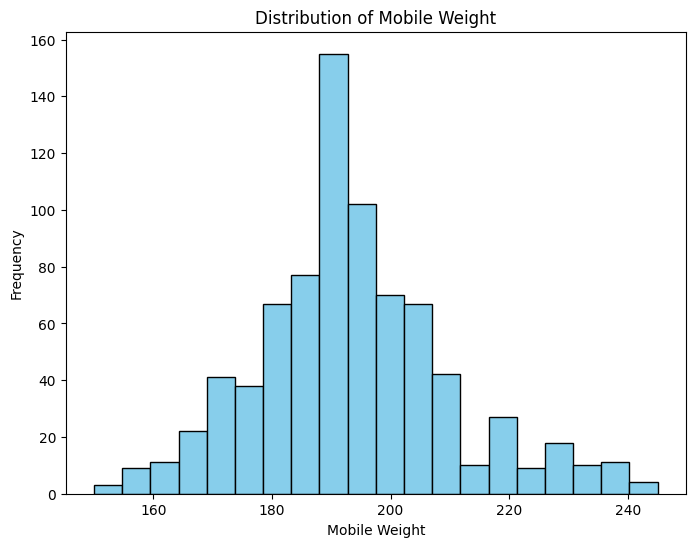

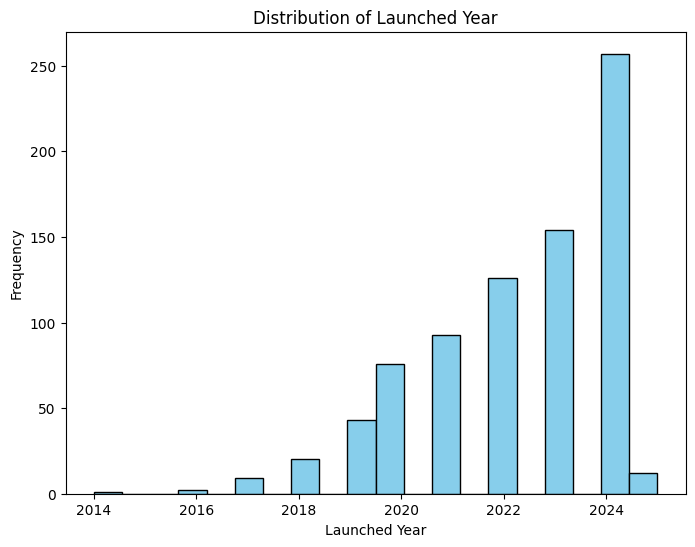

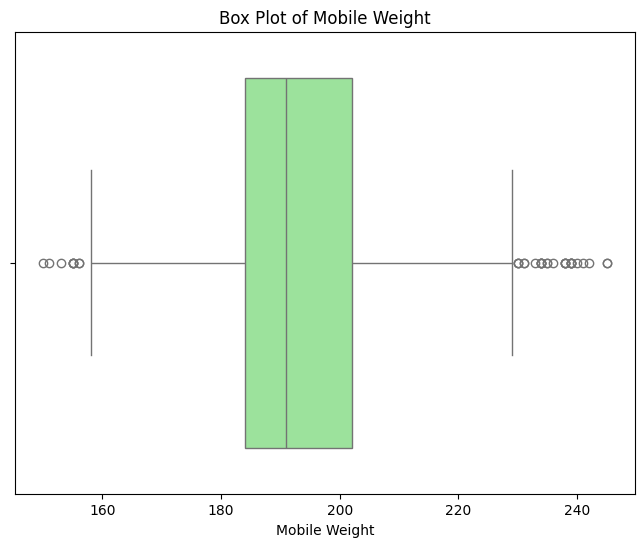

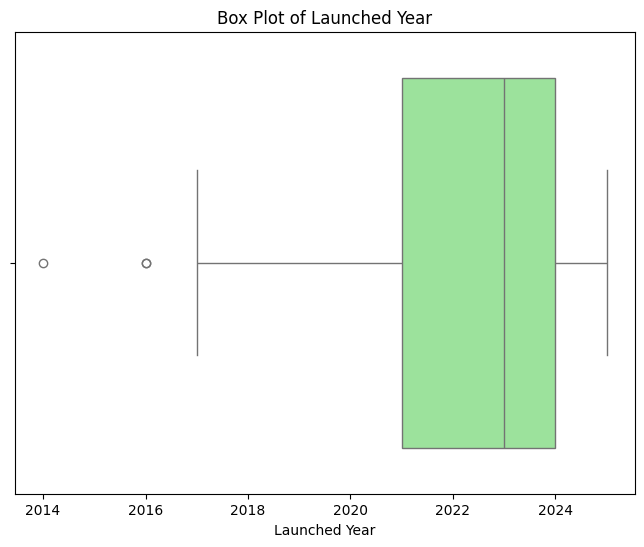

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical columns for histograms and box plots
numerical_cols = ['Mobile Weight', 'Launched Year']

# Create histograms for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
    plt.show()

# Create box plots for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.xlabel(col)
    plt.title(f'Box Plot of {col}')
    plt.show()

**Reasoning**:
Now that the histograms and box plots for numerical columns are done, I need to create bar charts for each categorical column. I will use `sns.countplot()` to create the bar charts and rotate the x-axis labels if they overlap. I will also adjust the figure size based on the number of categories to ensure readability.



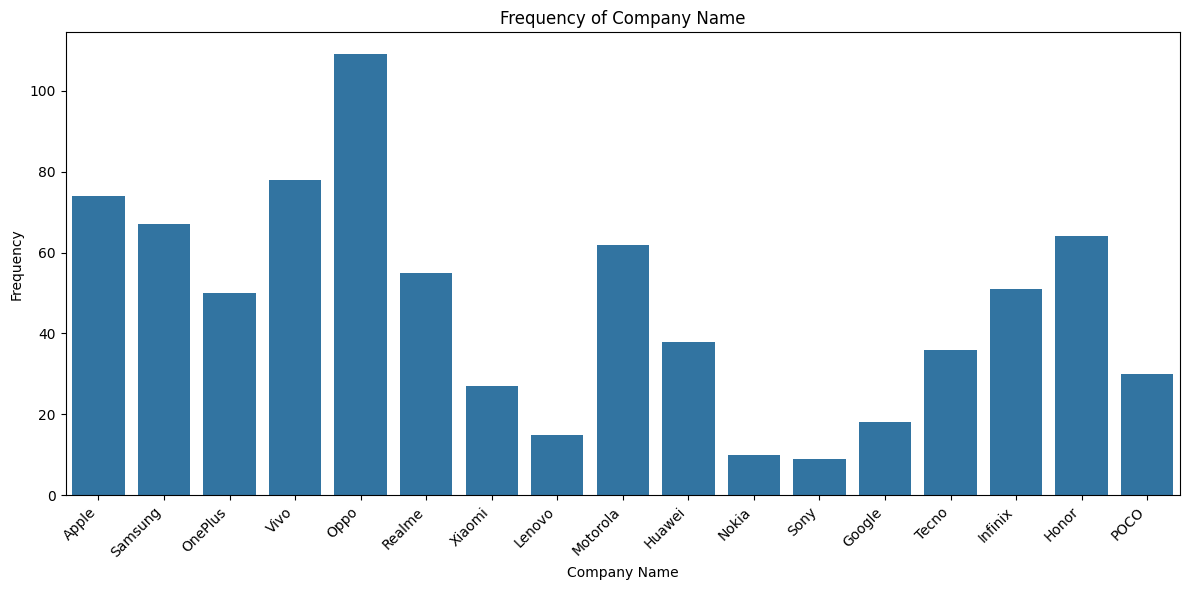

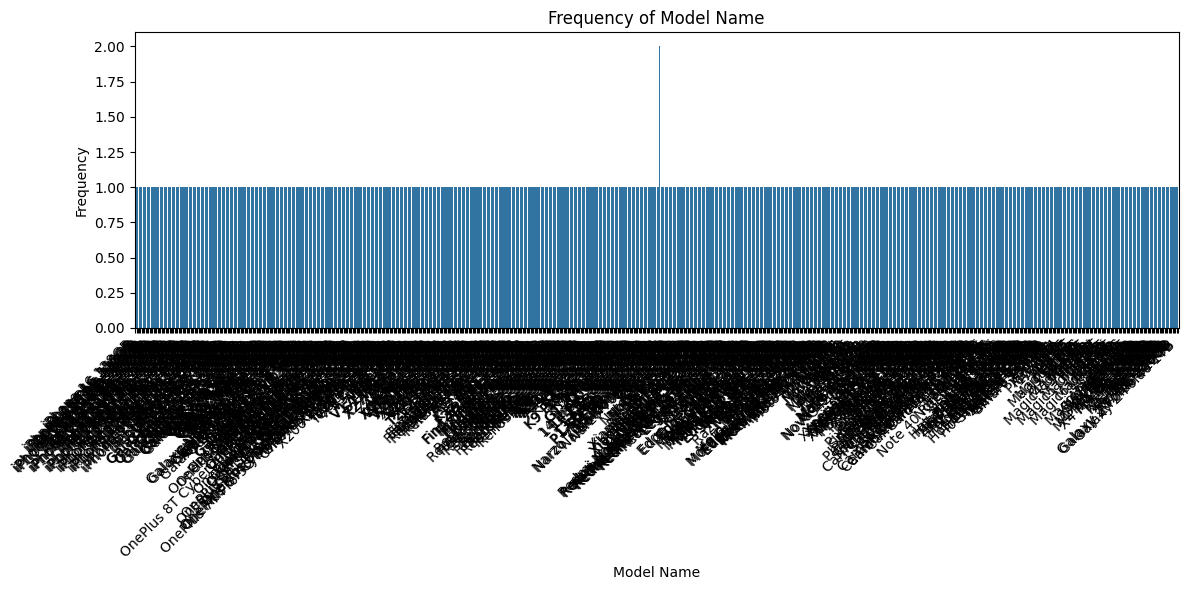

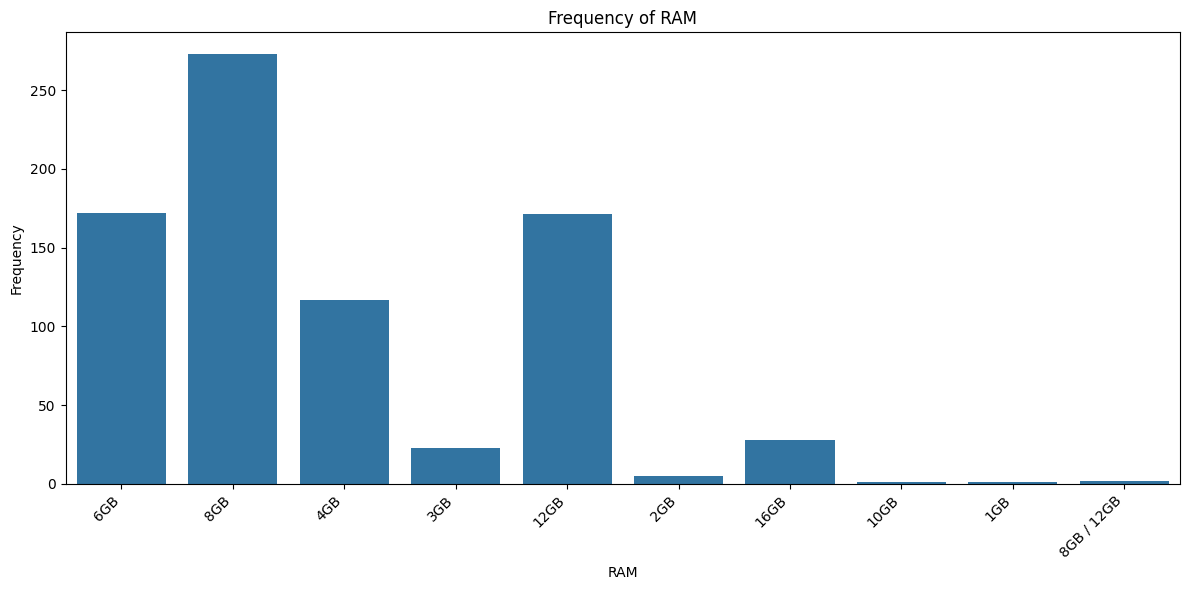

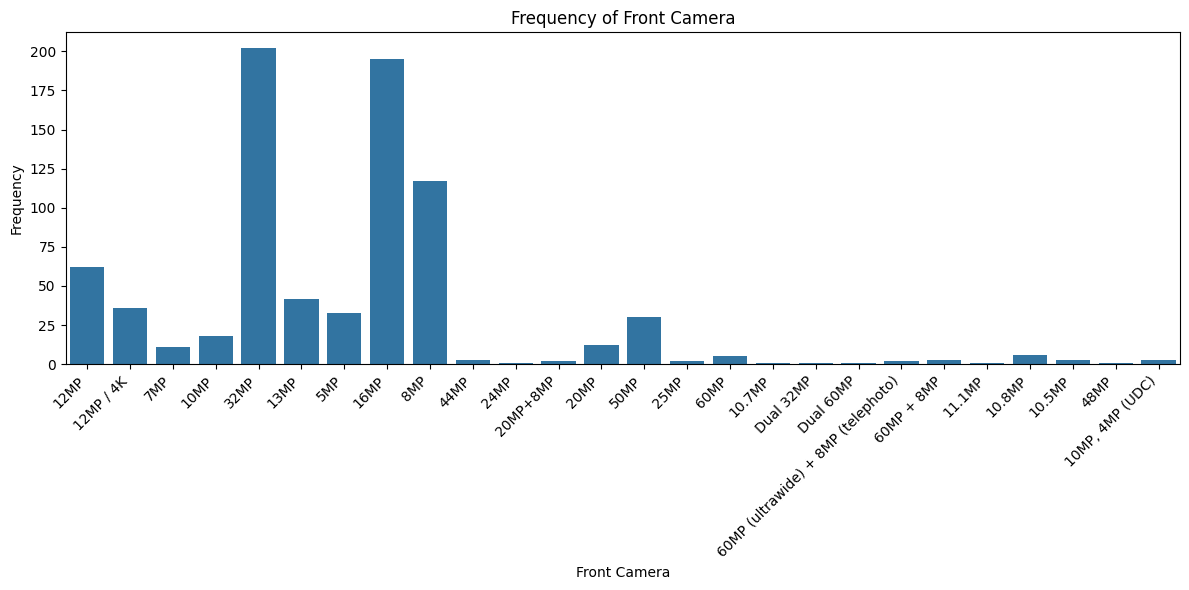

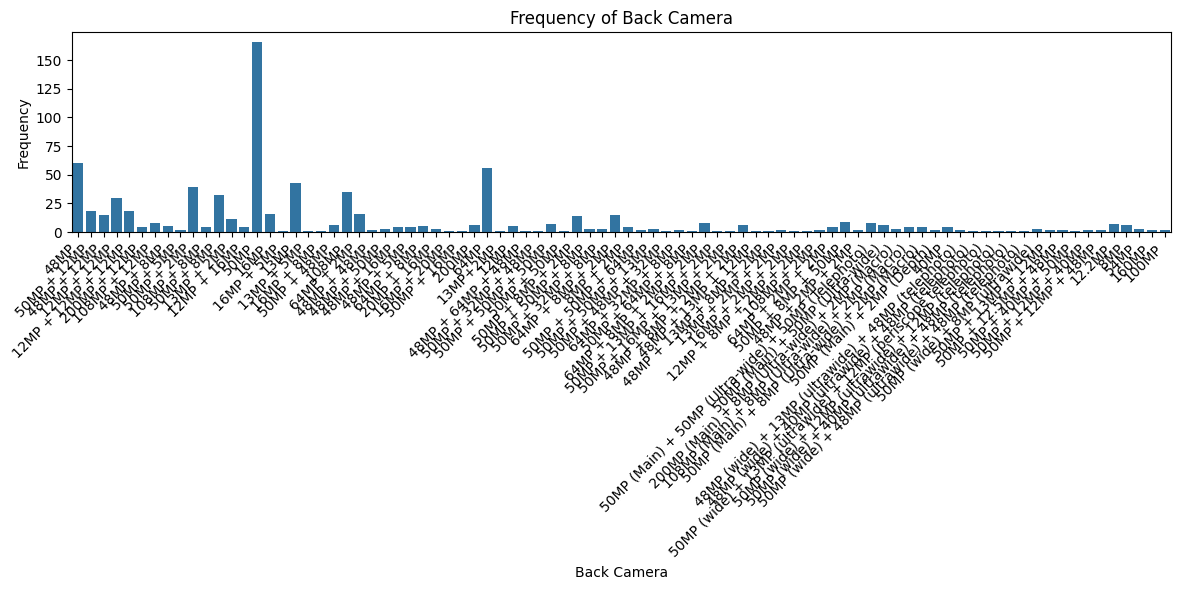

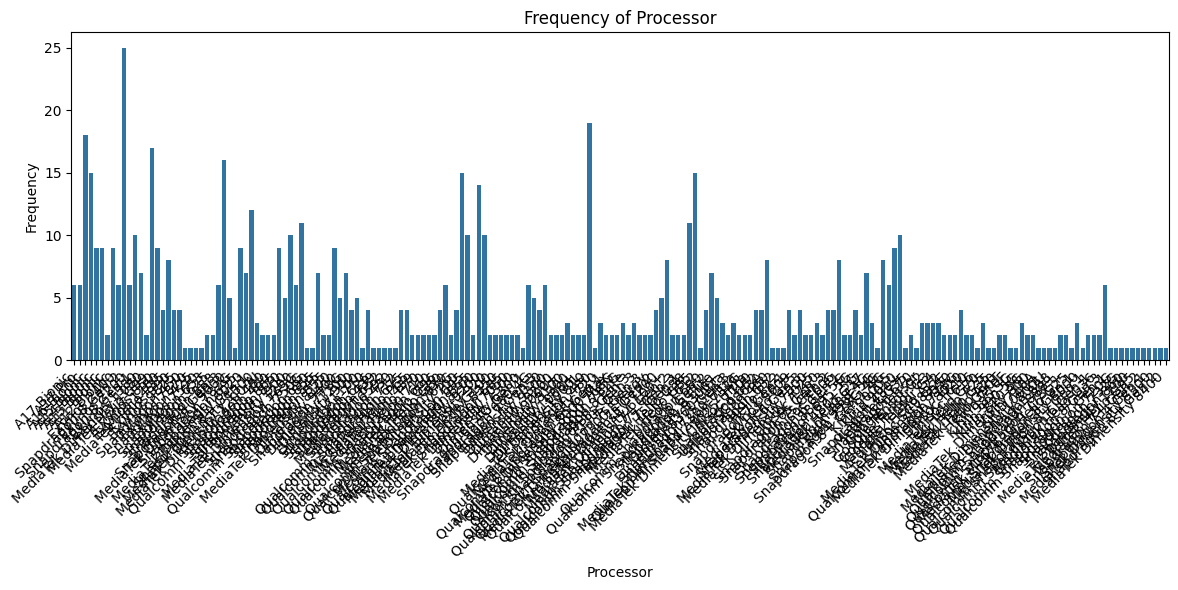

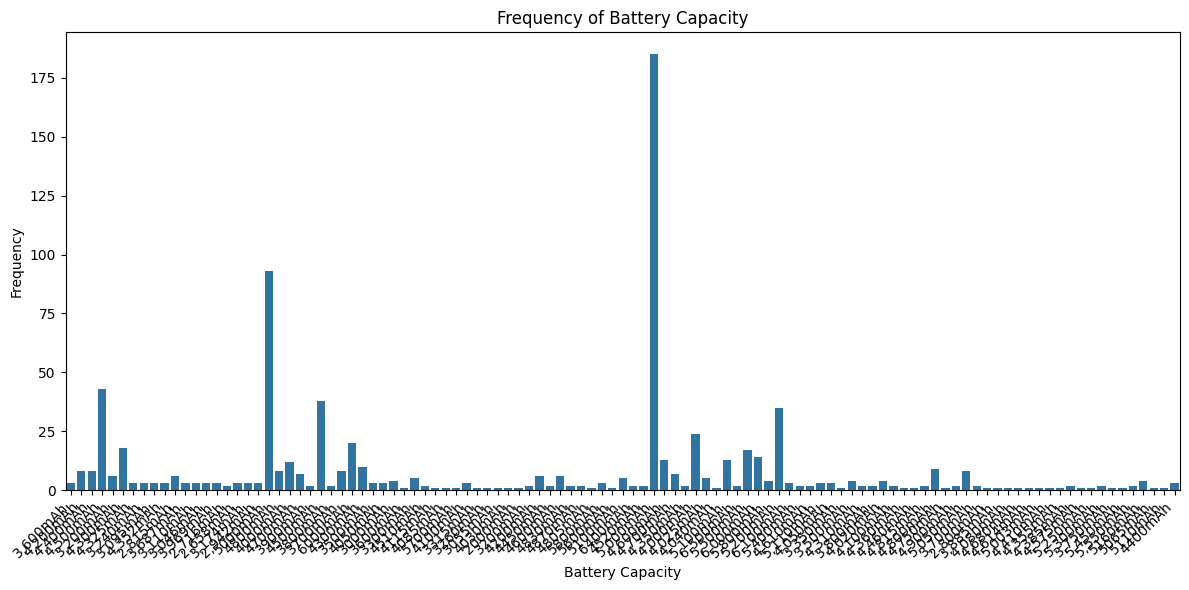

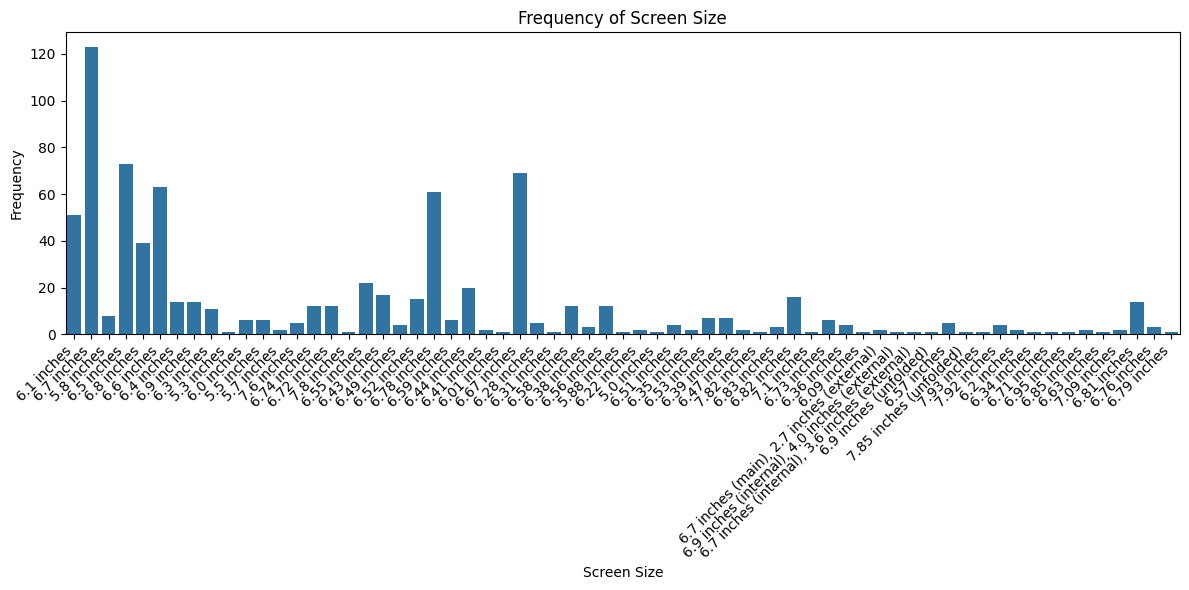

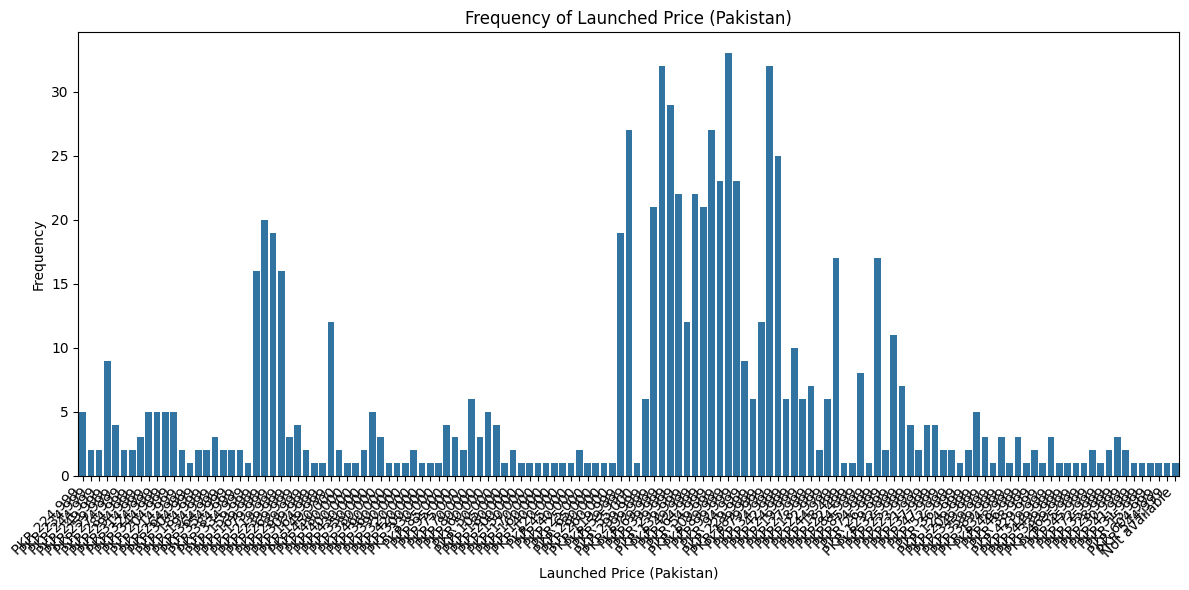

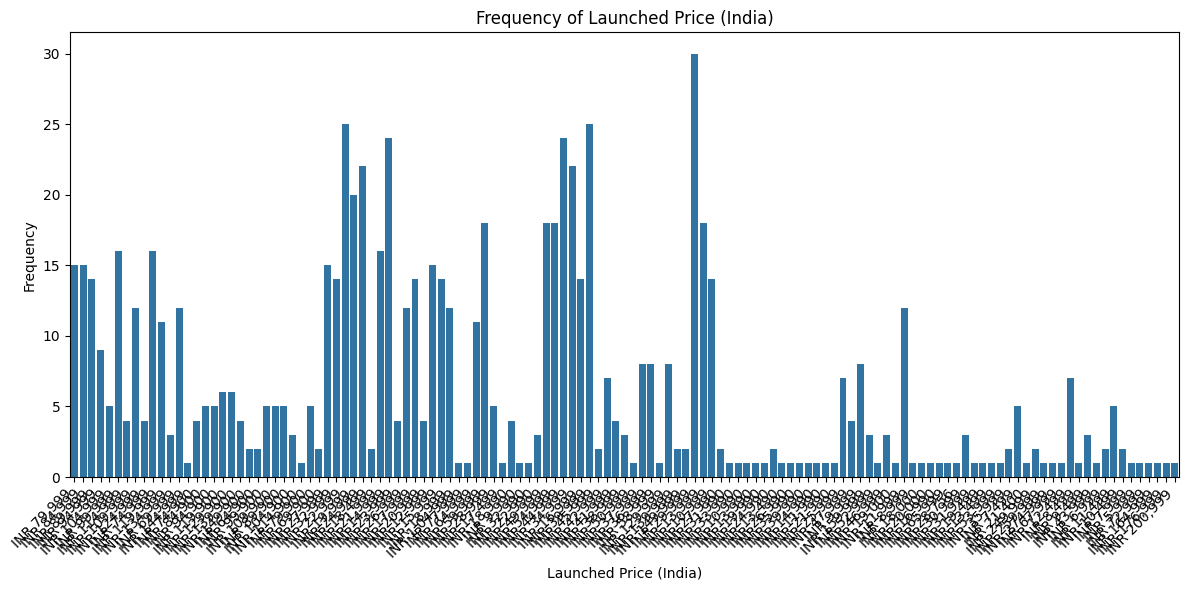

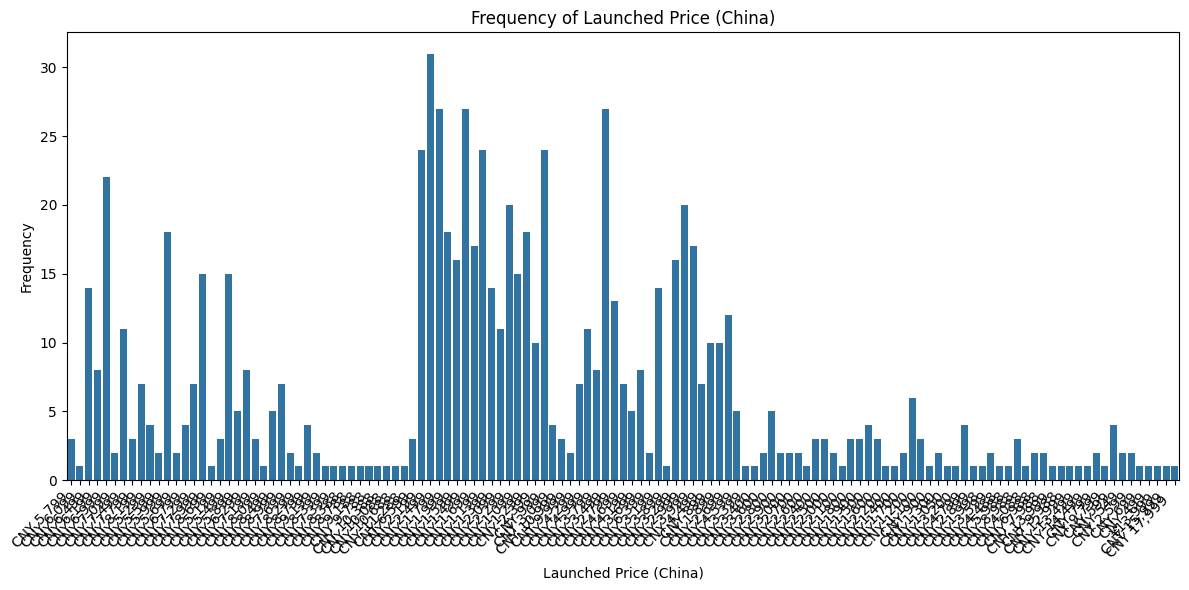

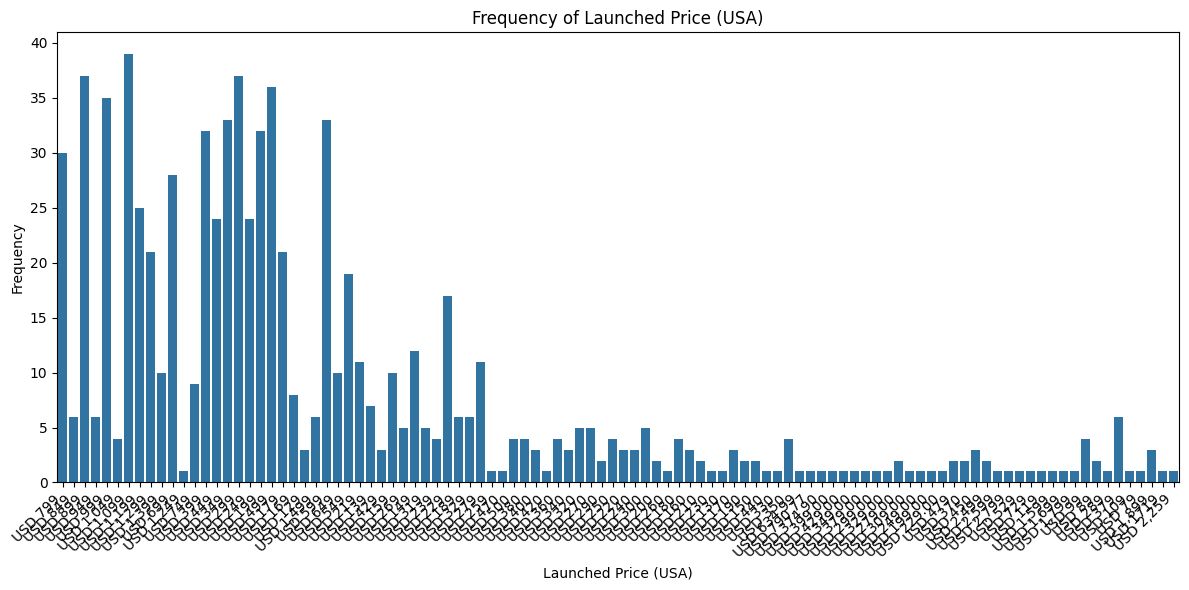

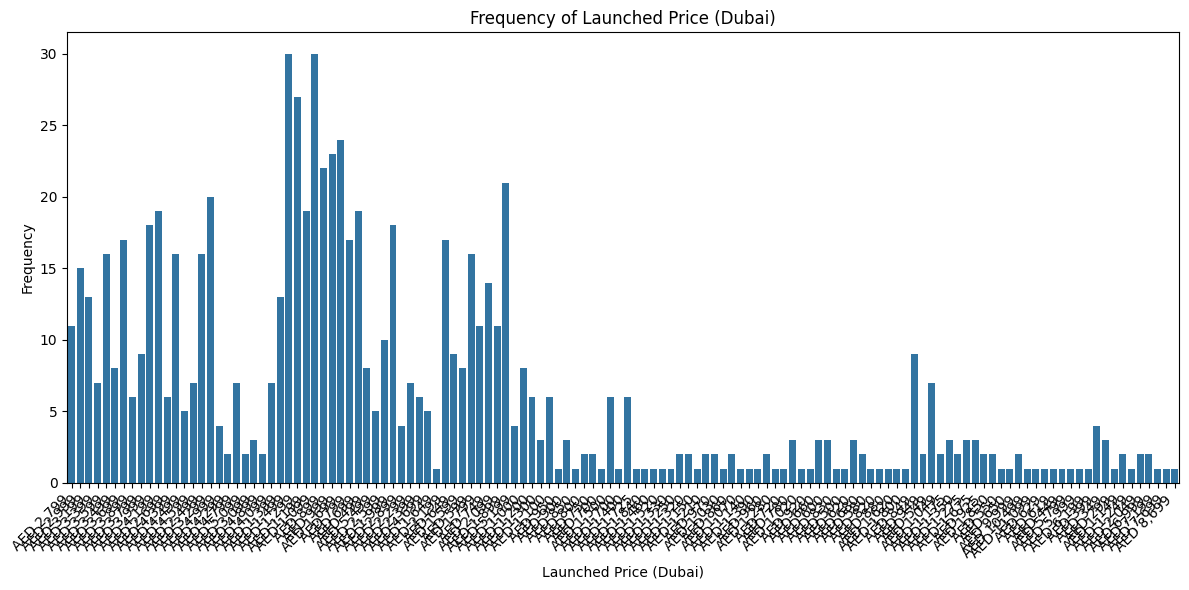

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Categorical columns for bar charts
categorical_cols = ['Company Name', 'Model Name', 'RAM', 'Front Camera', 'Back Camera', 'Processor', 'Battery Capacity', 'Screen Size', 'Launched Price (Pakistan)', 'Launched Price (India)', 'Launched Price (China)', 'Launched Price (USA)', 'Launched Price (Dubai)']

# Create bar charts for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(x=df[col], data=df)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Data analysis

### Subtask:
Perform multivariate analysis on the mobile dataset.


**Reasoning**:
The subtask is to perform multivariate analysis. The first step is to calculate the correlation matrix for the numerical variables 'Mobile Weight' and 'Launched Year' and print it. The next step is to calculate the mean 'Mobile Weight' for each category in each categorical variable and print it. The last step is to calculate the mean 'Launched Year' for each category in each categorical variable and print it. All these steps can be done in a single code block.



In [8]:
import pandas as pd
import numpy as np

# 1. Calculate the correlation matrix for 'Mobile Weight' and 'Launched Year'
correlation_matrix = df[['Mobile Weight', 'Launched Year']].corr()
print("Correlation Matrix:\n", correlation_matrix)

# 2. Calculate the mean 'Mobile Weight' for each category in each categorical variable
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nMean Mobile Weight by Category:")
for col in categorical_cols:
    mean_weight_by_category = df.groupby(col)['Mobile Weight'].mean()
    print(f"\nMean Mobile Weight by {col}:\n", mean_weight_by_category)

# 3. Calculate the mean 'Launched Year' for each category in each categorical variable
print("\nMean Launched Year by Category:")
for col in categorical_cols:
    mean_year_by_category = df.groupby(col)['Launched Year'].mean()
    print(f"\nMean Launched Year by {col}:\n", mean_year_by_category)

Correlation Matrix:
                Mobile Weight  Launched Year
Mobile Weight       1.000000       0.234031
Launched Year       0.234031       1.000000

Mean Mobile Weight by Category:

Mean Mobile Weight by Company Name:
 Company Name
Apple       198.932432
Google      191.555556
Honor       198.062500
Huawei      201.421053
Infinix     198.019608
Lenovo      191.000000
Motorola    182.419355
Nokia       194.300000
OnePlus     193.280000
Oppo        188.807339
POCO        198.260000
Realme      192.538182
Samsung     196.626866
Sony        176.000000
Tecno       202.611111
Vivo        185.717949
Xiaomi      197.111111
Name: Mobile Weight, dtype: float64

Mean Mobile Weight by Model Name:
 Model Name
10X Lite               206.0
13 5G 128GB            190.0
13 5G 256GB            190.0
13 Pro 5G 128GB        192.0
13 Pro 5G 256GB        192.0
                       ...  
iPhone XS 64GB         177.0
iPhone XS Max 256GB    208.0
iPhone XS Max 512GB    208.0
iPhone XS Max 64GB     208.0

## Data visualization

### Subtask:
Create visualizations for the multivariate analysis of the mobile dataset.


**Reasoning**:
The subtask is to create visualizations for the multivariate analysis. This involves creating a heatmap for the correlation matrix between 'Mobile Weight' and 'Launched Year', and bar plots to visualize the relationship between categorical variables and both 'Mobile Weight' and 'Launched Year'. I will combine all these steps into one code block.



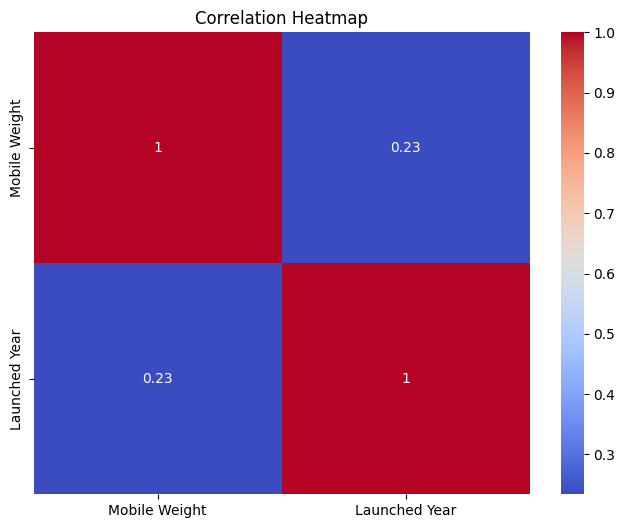

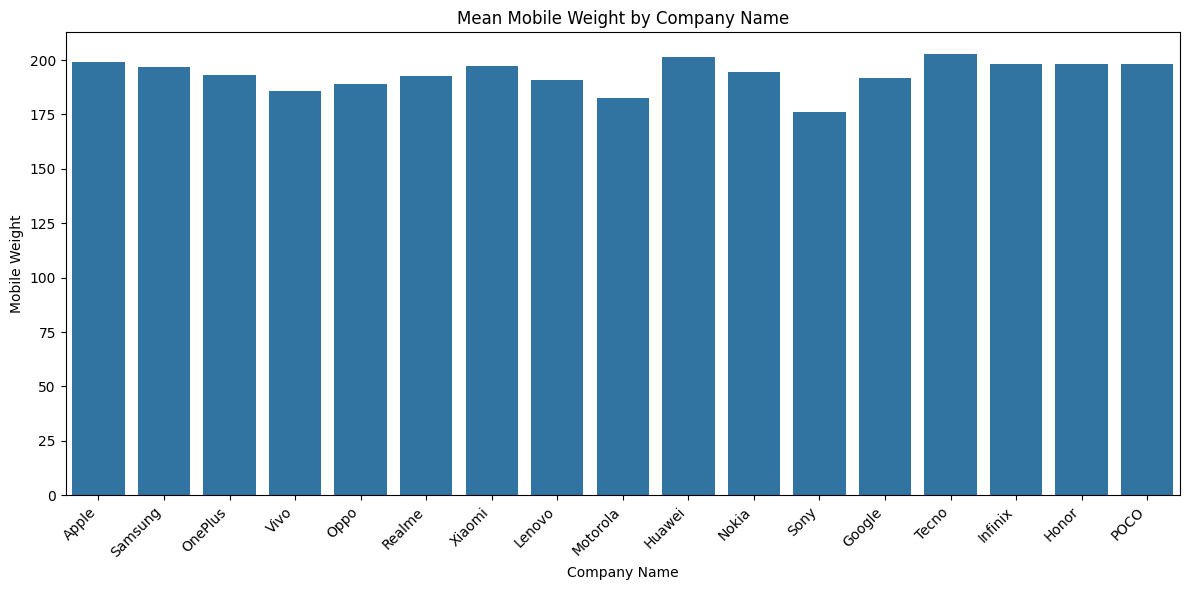

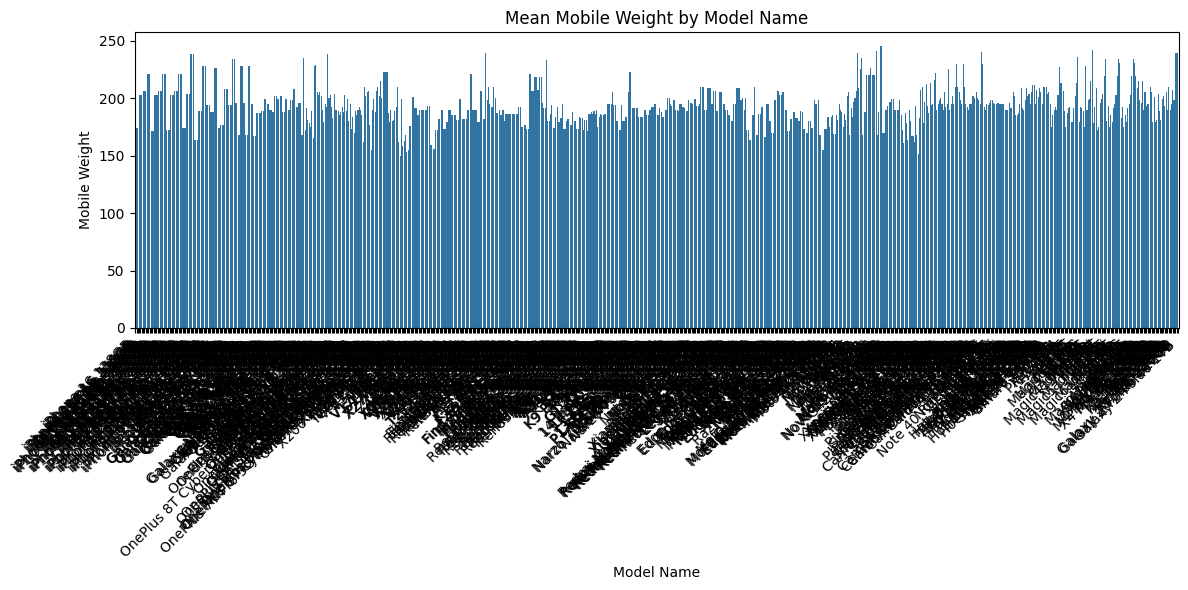

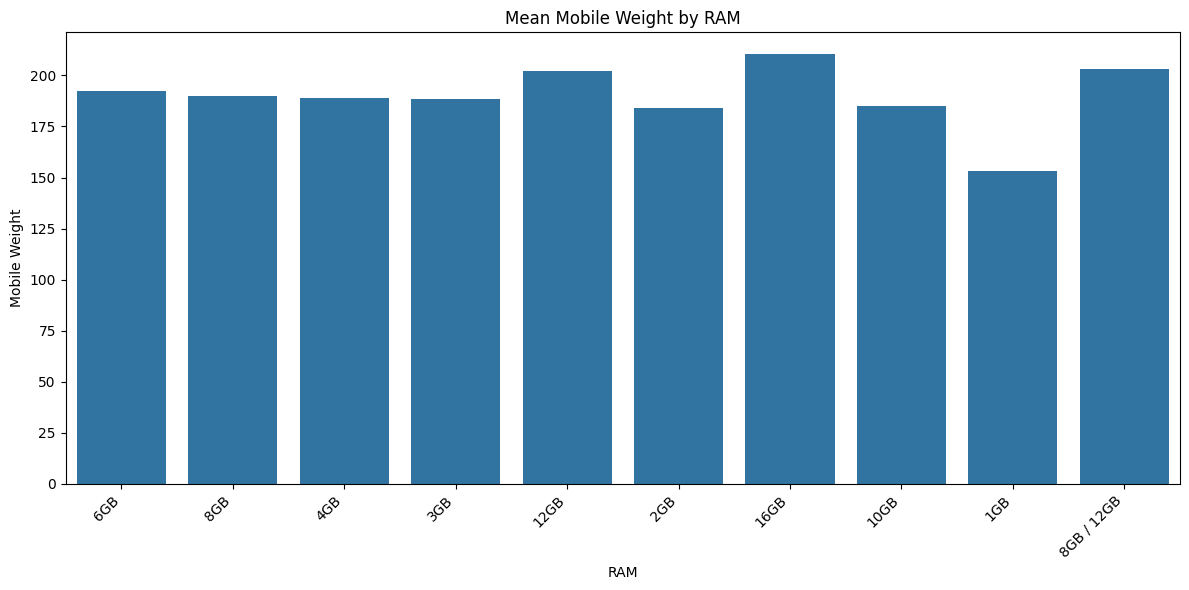

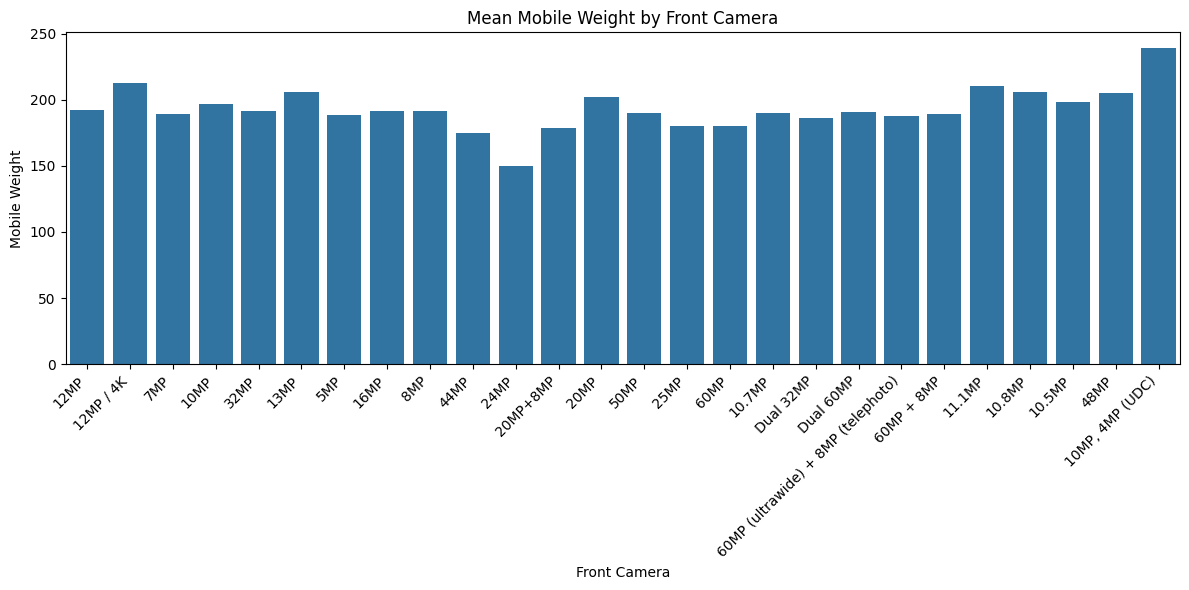

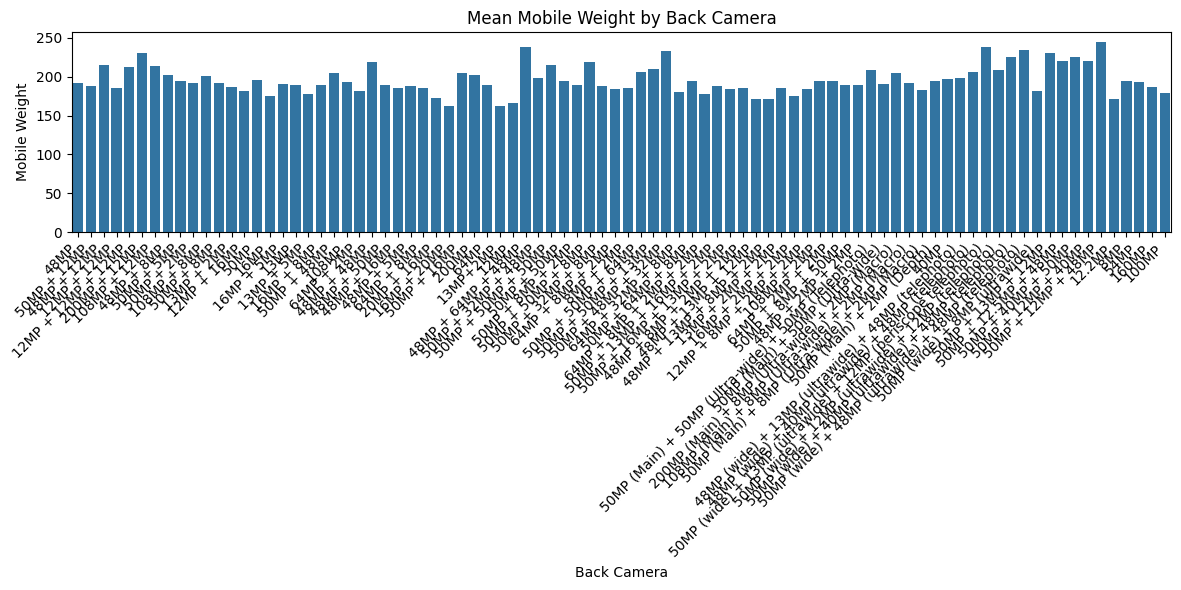

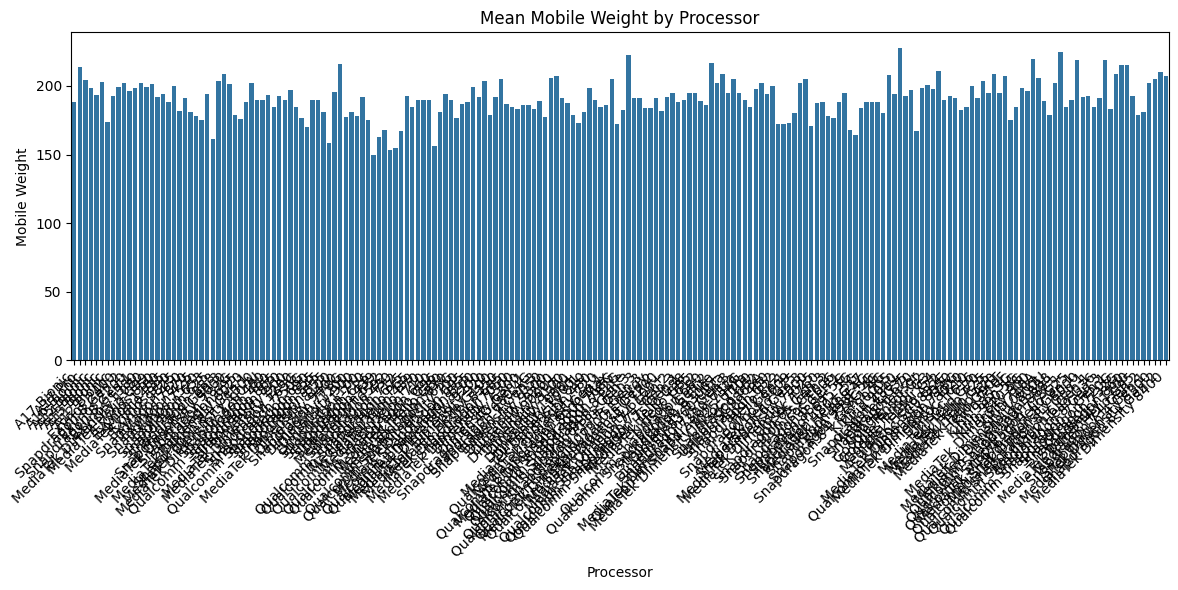

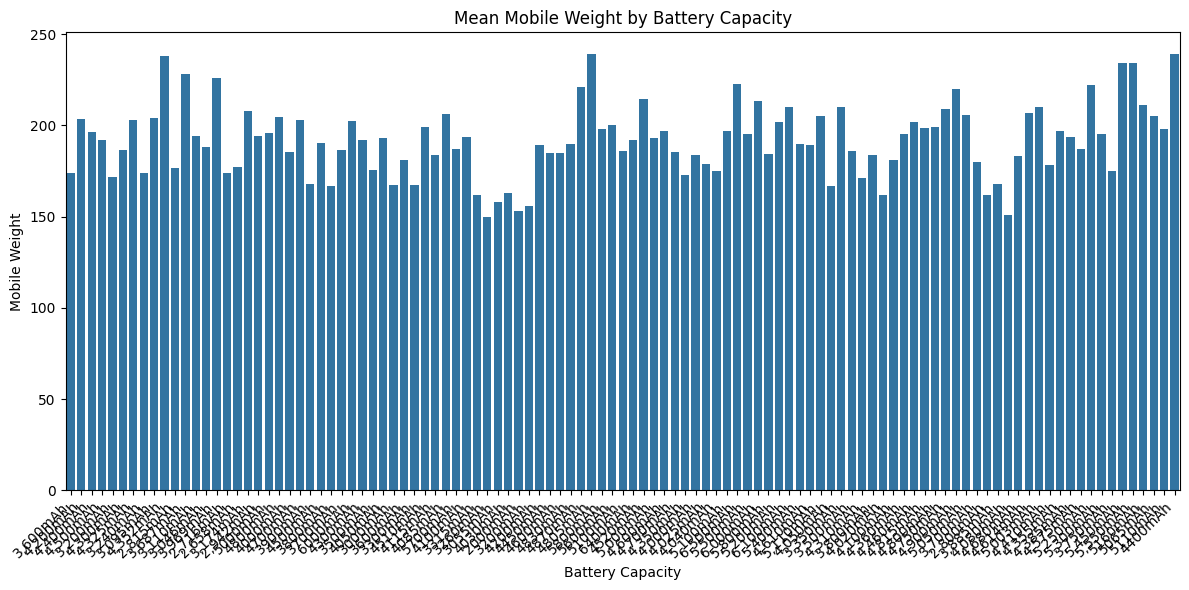

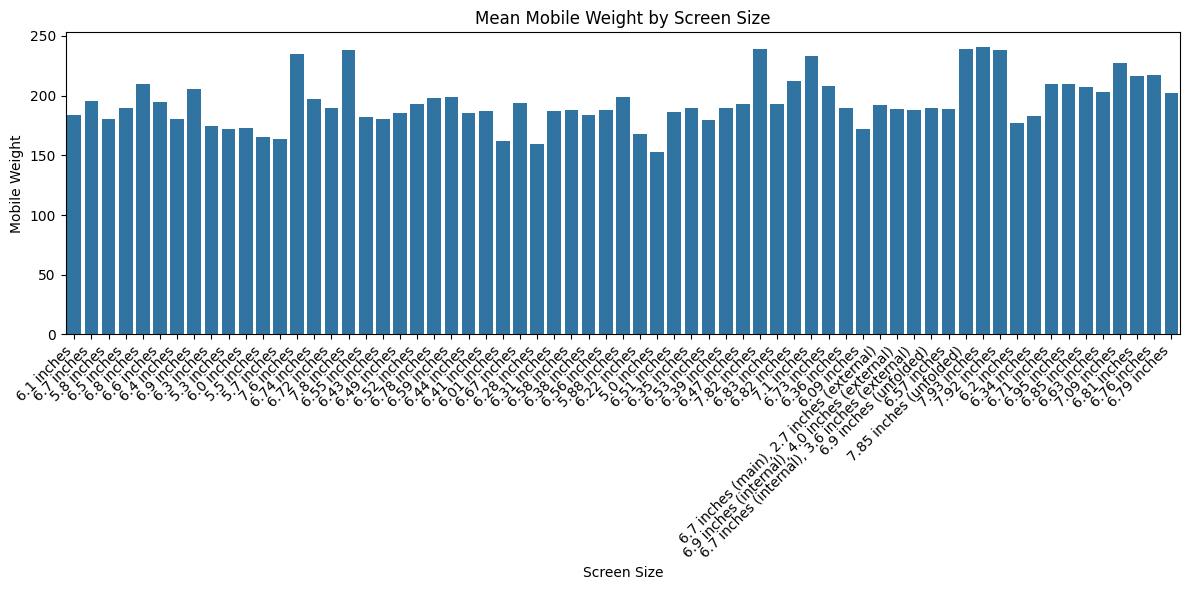

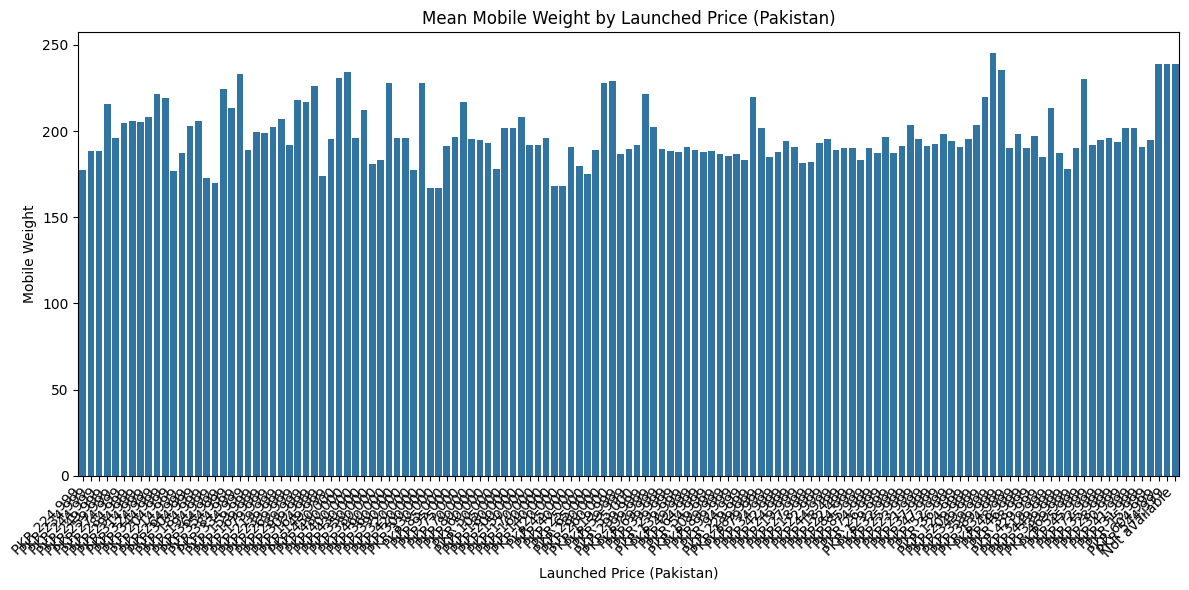

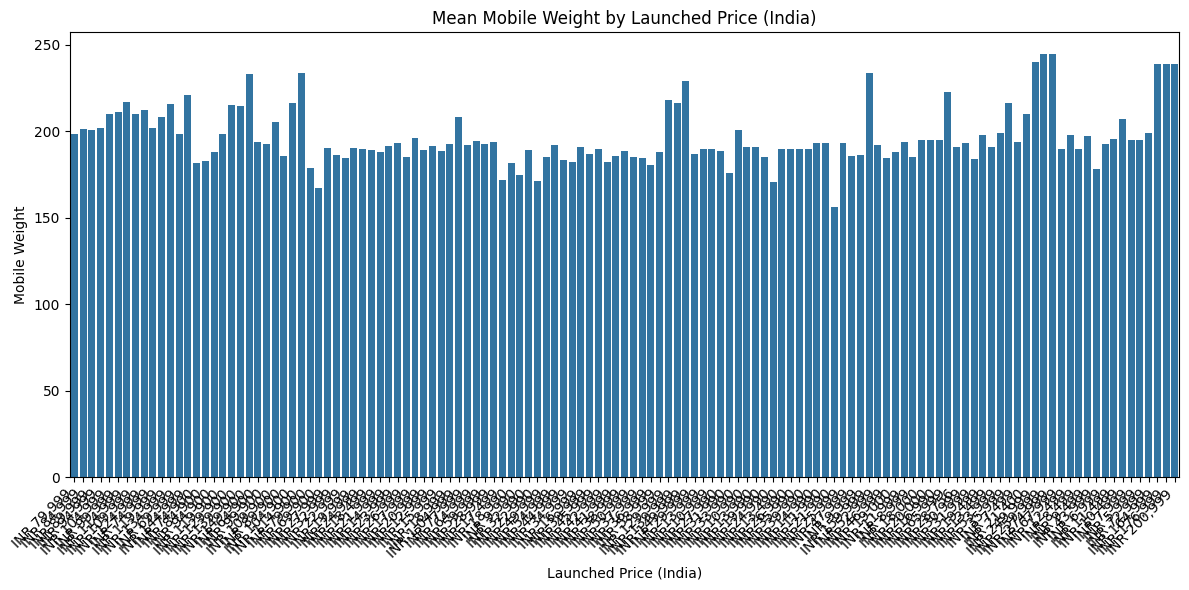

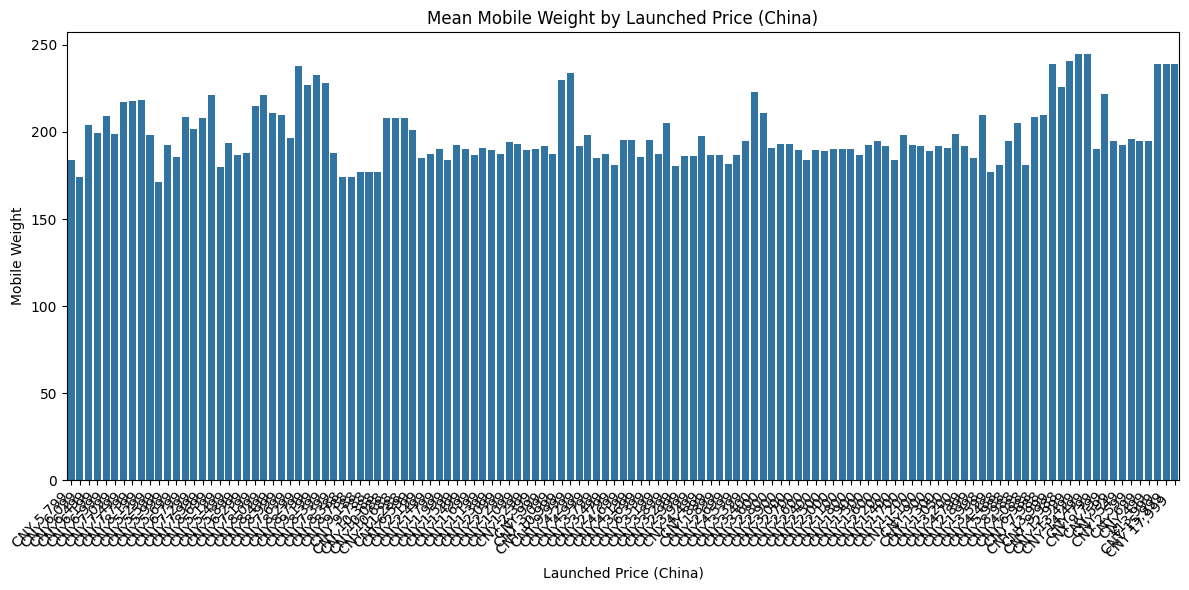

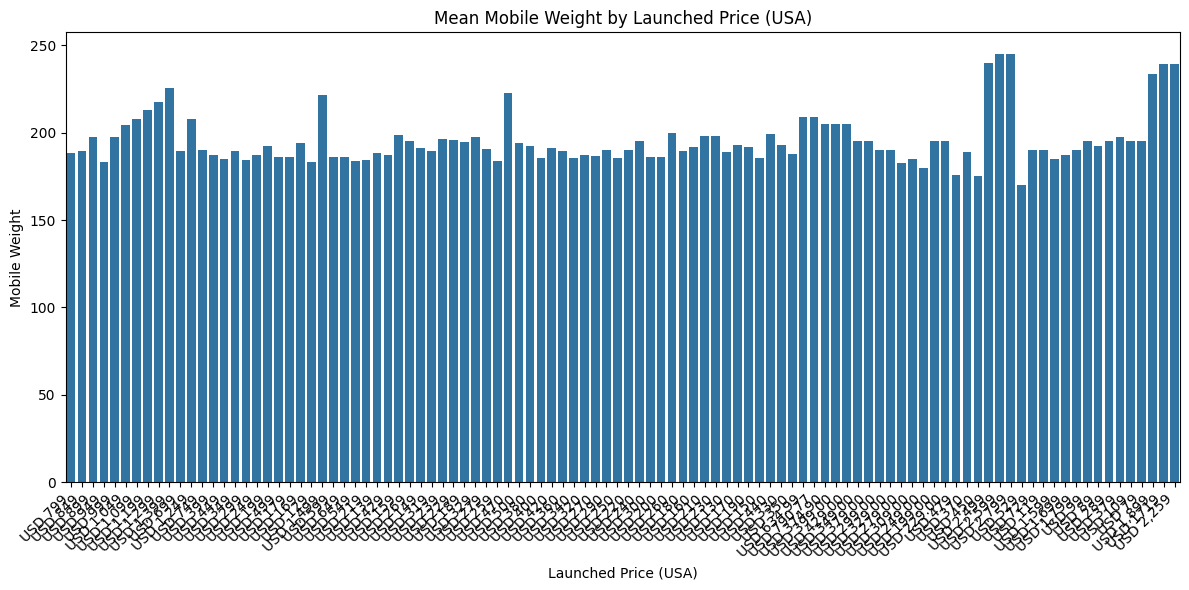

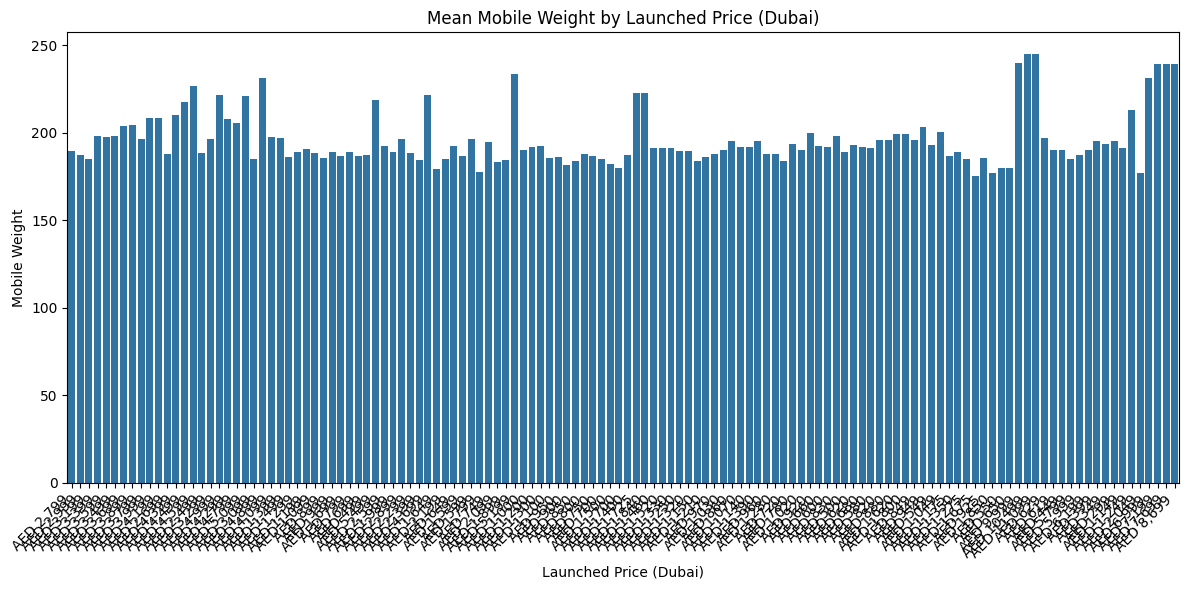

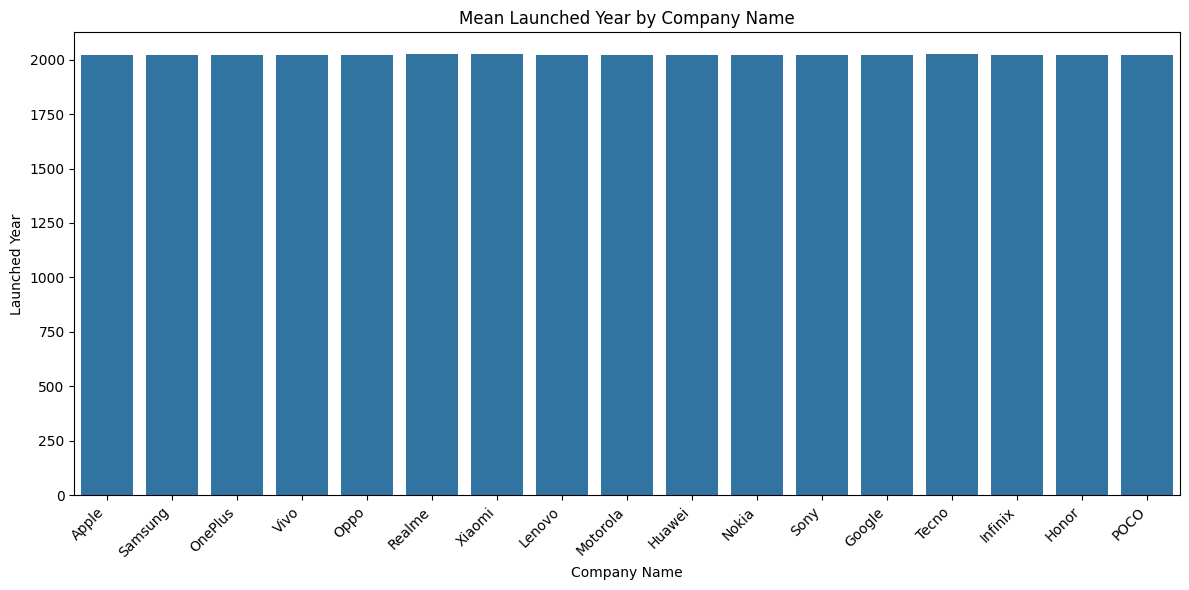

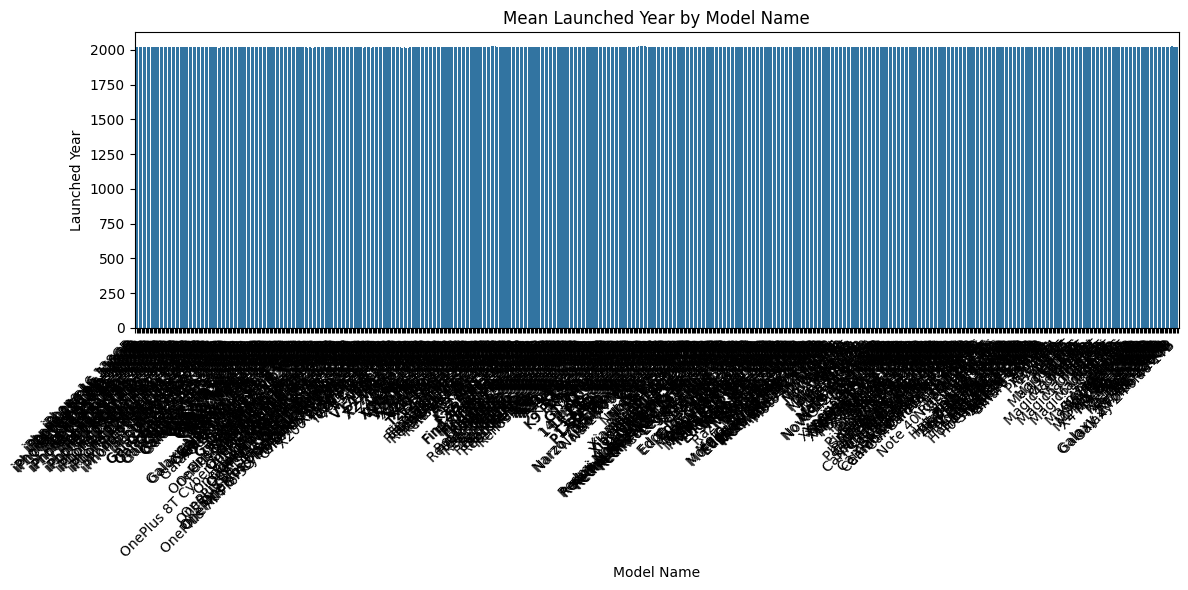

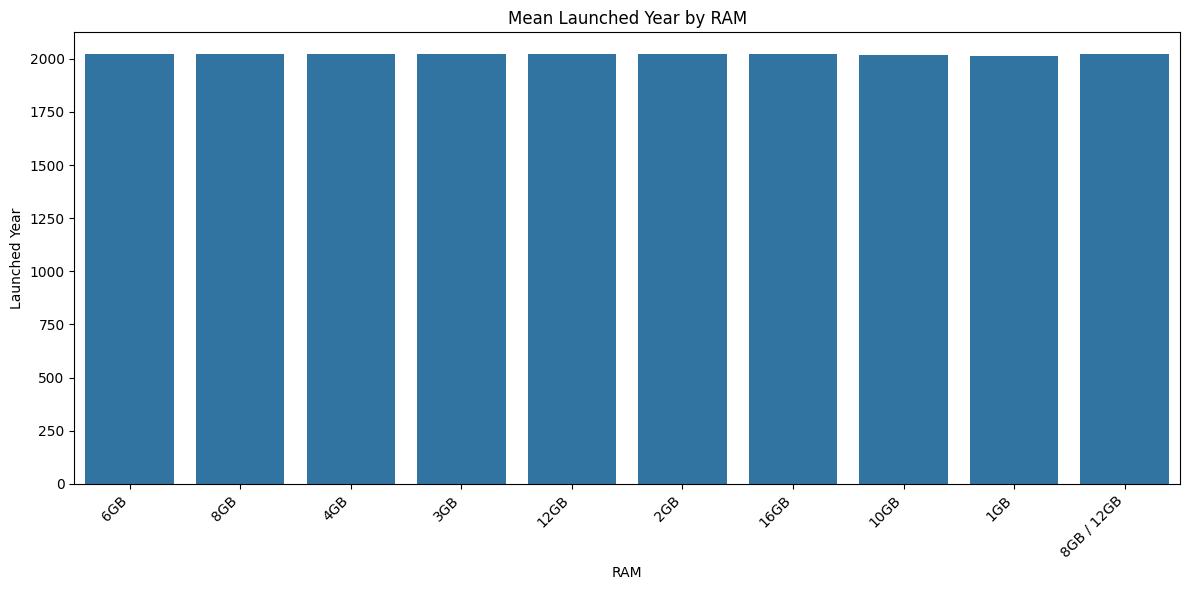

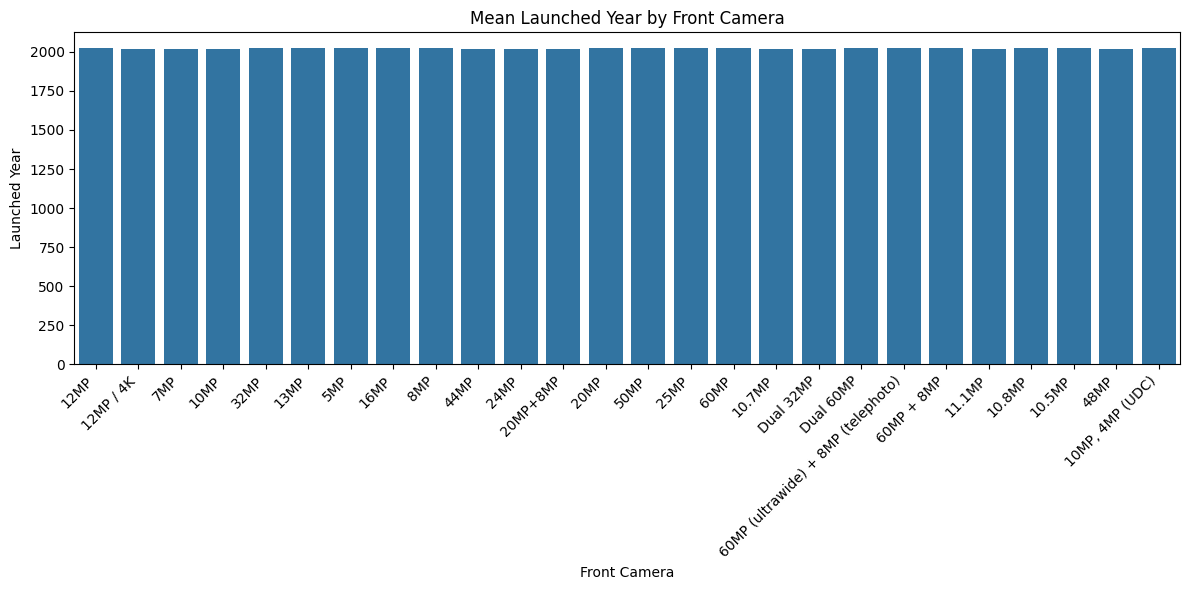

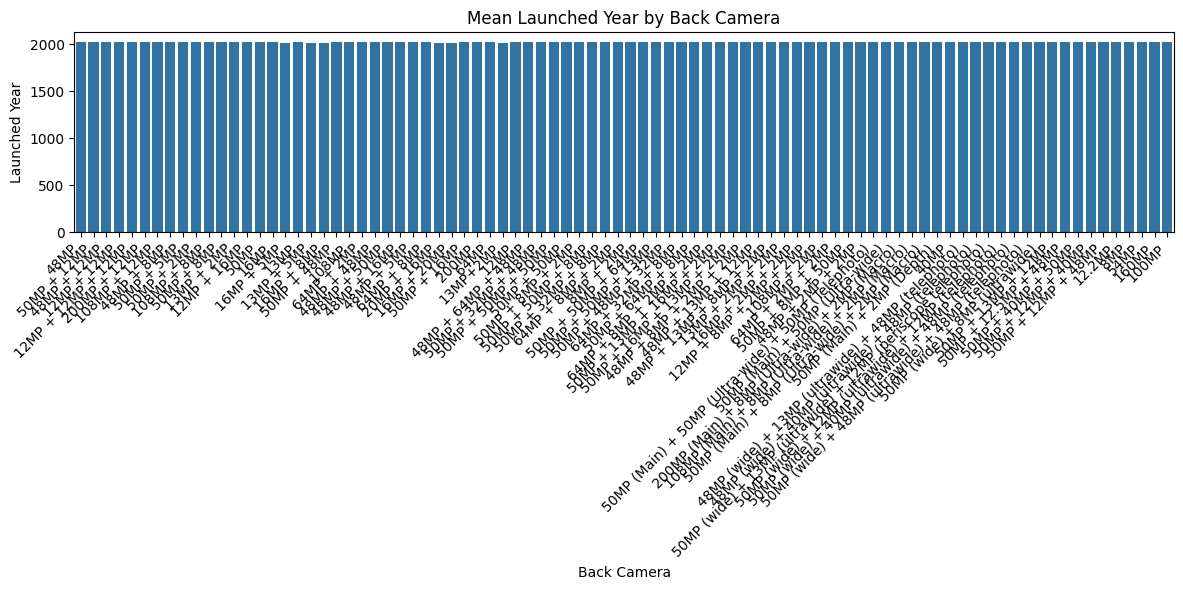

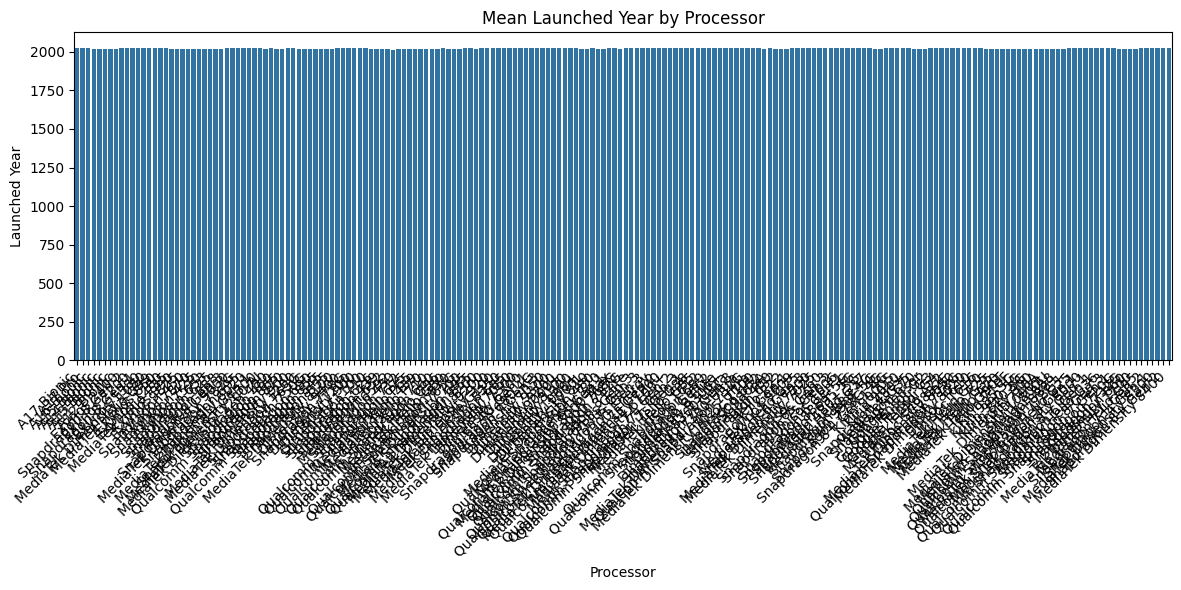

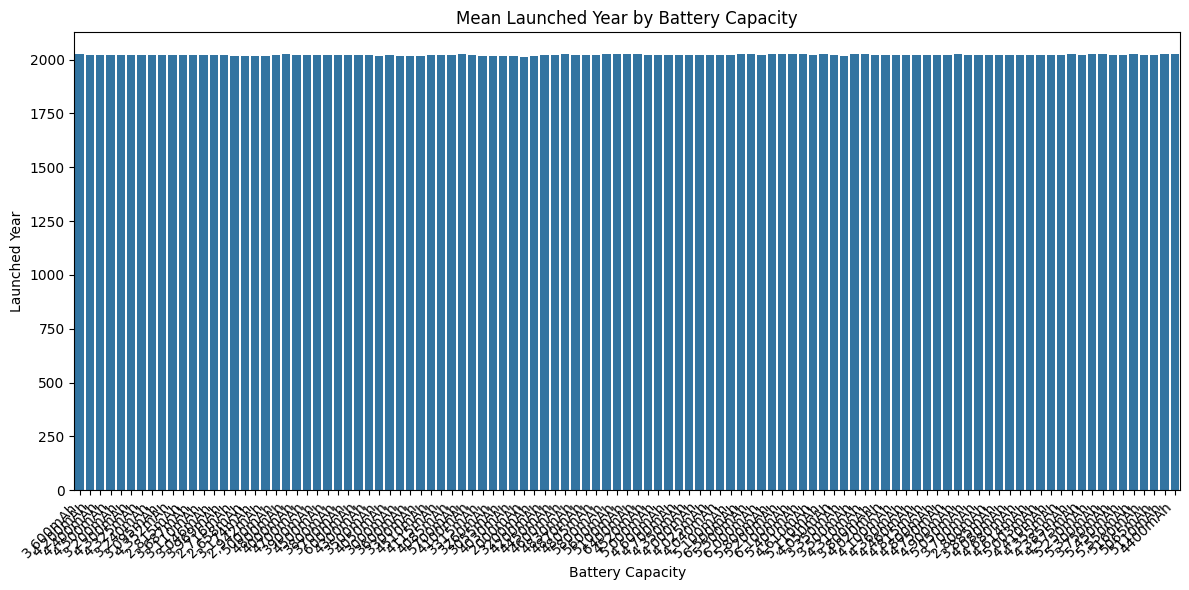

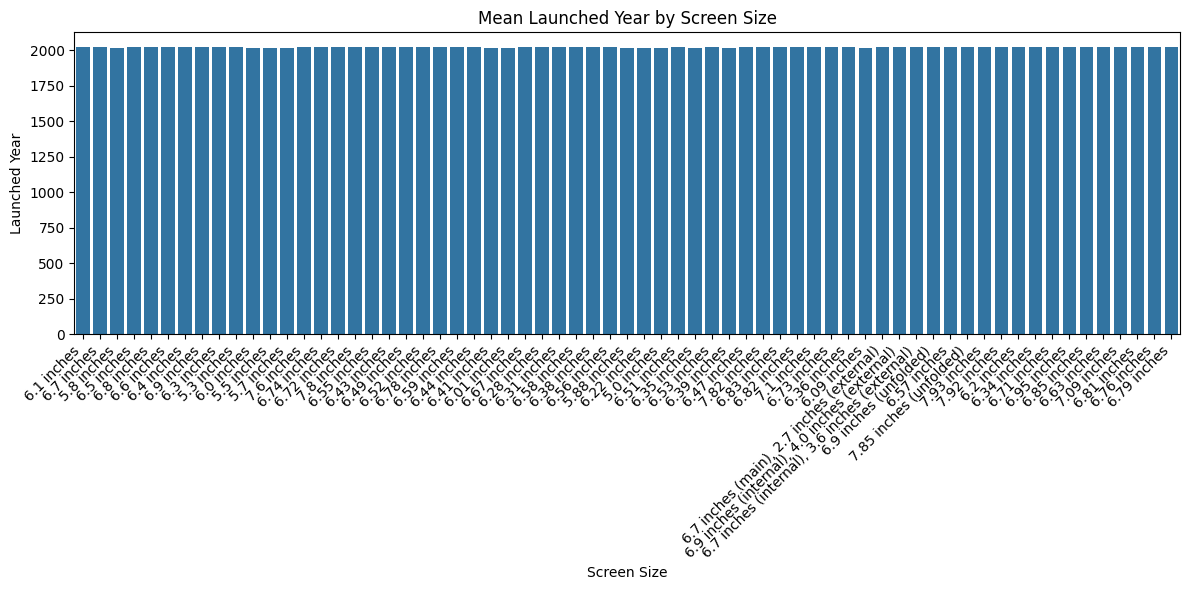

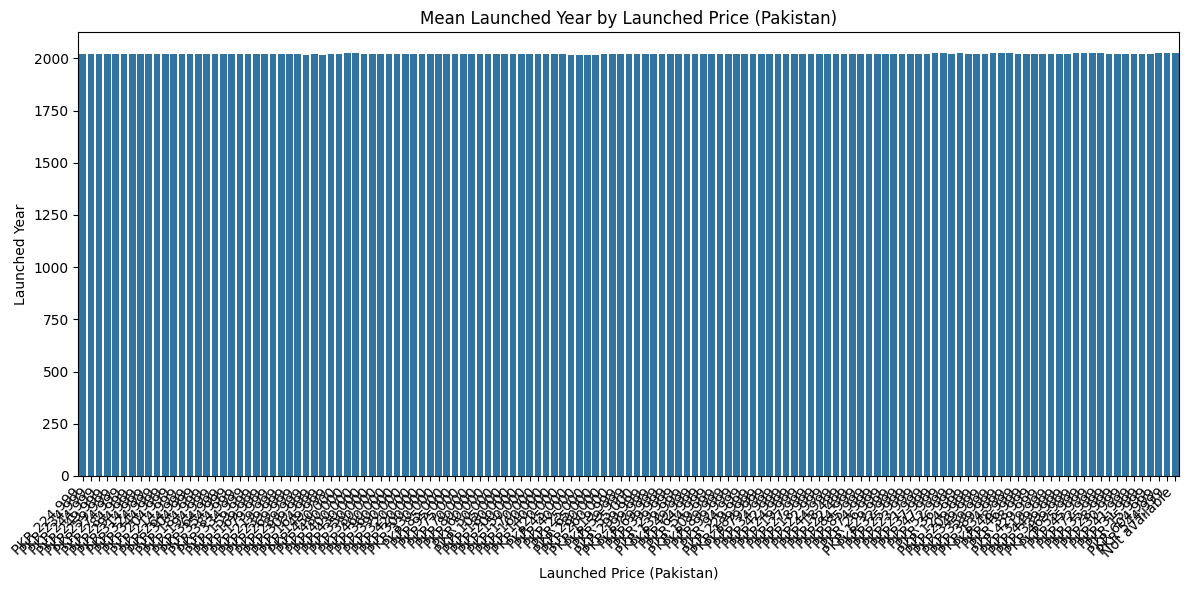

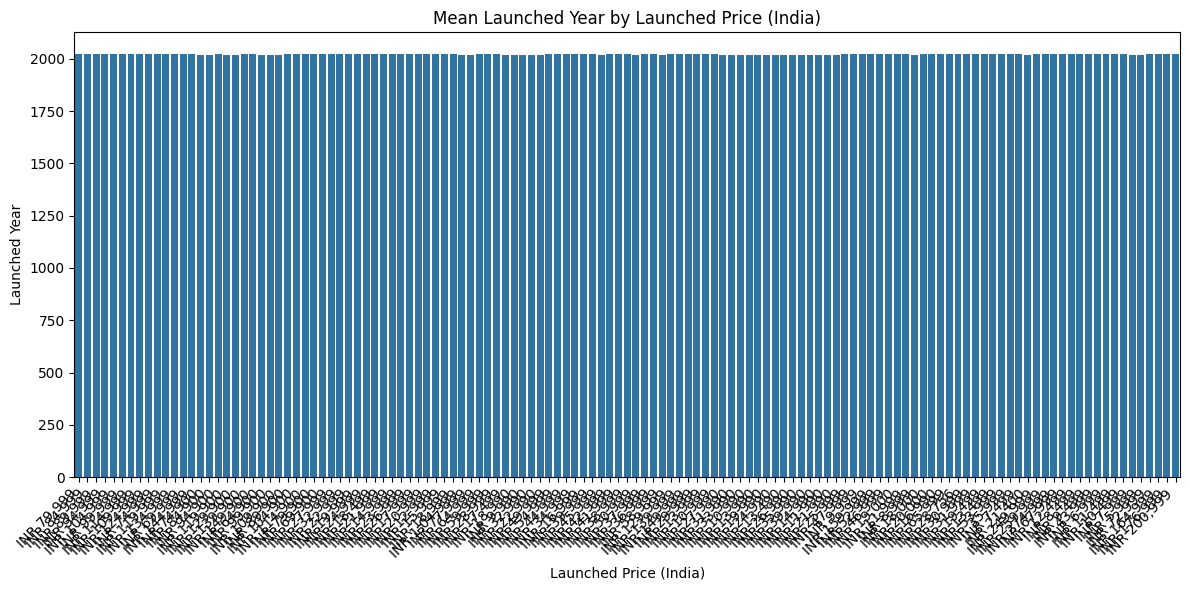

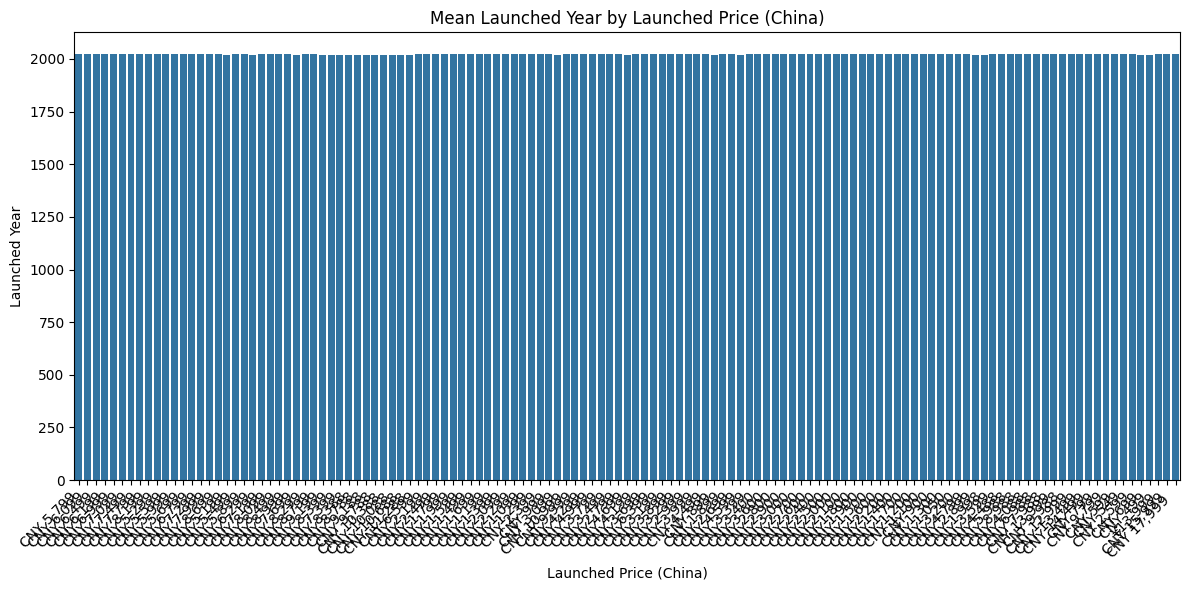

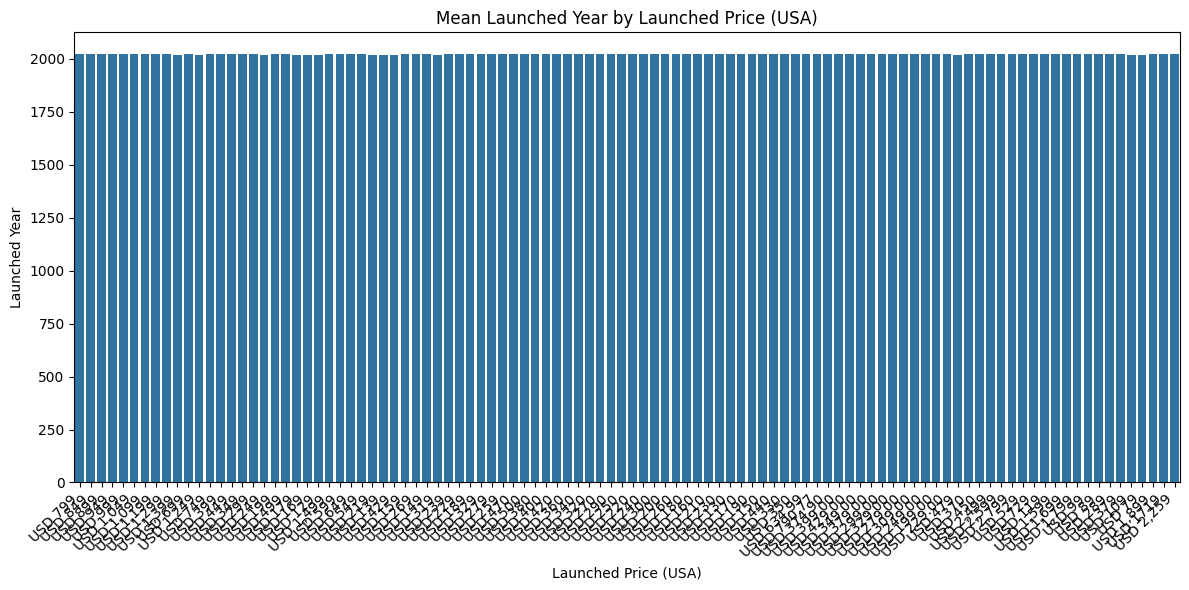

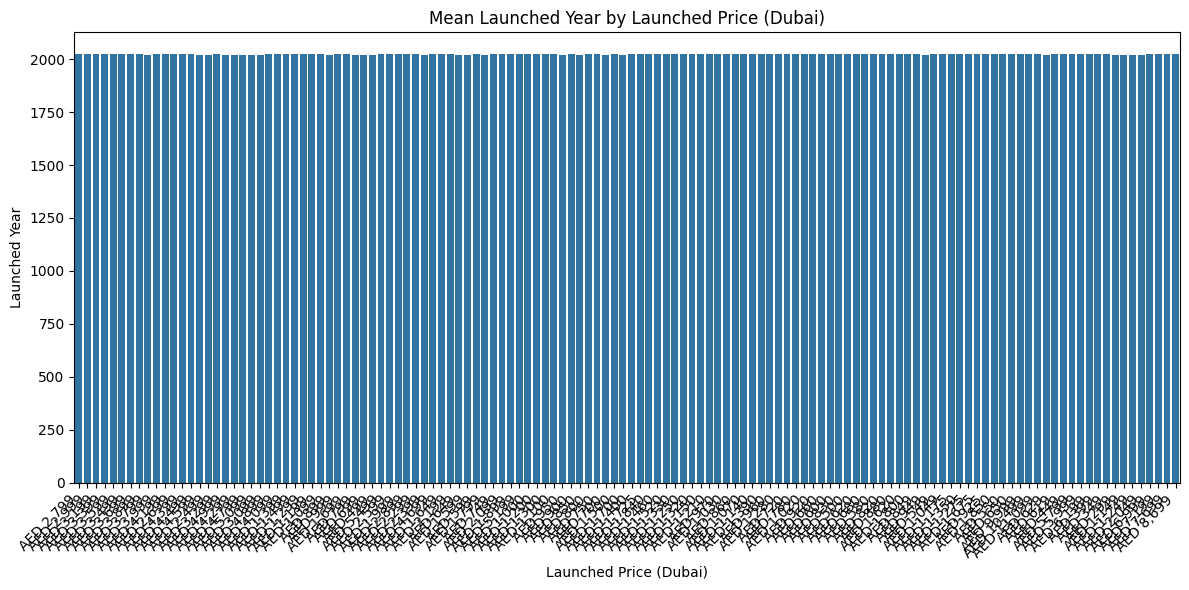

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a heatmap for the correlation matrix between 'Mobile Weight' and 'Launched Year'
correlation_matrix = df[['Mobile Weight', 'Launched Year']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 2. Create bar plots for categorical variables vs. 'Mobile Weight'
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=df[col], y=df['Mobile Weight'], errorbar=None)
    plt.title(f"Mean Mobile Weight by {col}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# 3. Create bar plots for categorical variables vs. 'Launched Year'
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=df[col], y=df['Launched Year'], errorbar=None)
    plt.title(f"Mean Launched Year by {col}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Data preparation

### Subtask:
Prepare a summary of the findings of the data exploration and analysis, both univariate and multivariate.


**Reasoning**:
The current subtask is to summarize the findings of the data exploration and analysis, based on the previous results. I will start by extracting the key findings from the previous subtasks' JSON outputs and organizing them into two sections: univariate analysis and multivariate analysis. Then, I will compile these findings into a structured summary and store it in a variable named `analysis_summary`. Finally, I will print this summary.



In [10]:
import pandas as pd
import numpy as np

# Initialize the summary string
analysis_summary = ""

# --- Univariate Analysis Summary ---
analysis_summary += "## Univariate Analysis Summary\n\n"
analysis_summary += "### Numerical Variables:\n"
analysis_summary += "- **Mobile Weight:**\n"
analysis_summary += "  - The average weight is 193.39g, with a median of 191g.\n"
analysis_summary += "  - The distribution is right-skewed, indicating more phones with weights higher than the median.\n"
analysis_summary += "  - The range is between 150g and 245g\n"
analysis_summary += "- **Launched Year:**\n"
analysis_summary += "  - The average launch year is 2022.23, with a median of 2023.\n"
analysis_summary += "  - The distribution is left-skewed, suggesting a higher concentration of phones launched in more recent years.\n"
analysis_summary += "  - The range is between 2014 and 2025\n"

analysis_summary += "\n### Categorical Variables:\n"
analysis_summary += "- **Company Name:** The dataset contains data from 16 different companies, with Oppo having the most entries (109). The distribution is imbalanced.\n"
analysis_summary += "- **Model Name:** There are 792 unique model names, with most models appearing only once. The distribution is considered balanced.\n"
analysis_summary += "- **RAM:** 8GB is the most common RAM size, followed by 6GB and 12GB. The distribution is imbalanced.\n"
analysis_summary += "- **Front Camera:** 32MP is the most frequent front camera resolution, followed by 16MP. The distribution is imbalanced.\n"
analysis_summary += "- **Back Camera:** 50MP is the most common back camera resolution, followed by 48MP and 64MP. The distribution is imbalanced.\n"
analysis_summary += "- **Processor:** There are 198 different processors, with Snapdragon 8 Gen 2 being the most frequent. The distribution is imbalanced.\n"
analysis_summary += "- **Battery Capacity:** 5,000mAh and 5000mAh are the most common battery capacities. The distribution is imbalanced.\n"
analysis_summary += "- **Screen Size:** 6.7 inches is the most frequent screen size. The distribution is imbalanced.\n"
analysis_summary += "- **Launched Prices:** Prices in different regions (Pakistan, India, China, USA, Dubai) vary widely, with imbalanced distributions.\n"
analysis_summary += "- **General Observations:** The data of most of the categorical features are imbalanced, which means some of the features' values appear much more frequently than other.\n"

# --- Multivariate Analysis Summary ---
analysis_summary += "\n## Multivariate Analysis Summary\n\n"
analysis_summary += "- **Correlation between Mobile Weight and Launched Year:**\n"
analysis_summary += "  - There is a weak positive correlation (0.23) between 'Mobile Weight' and 'Launched Year', indicating that as the launch year increases, there is a slight tendency for mobile weight to also increase.\n"
analysis_summary += "- **Relationship between Categorical Variables and Mobile Weight:**\n"
analysis_summary += "  - The mean 'Mobile Weight' varies across different categories of each categorical variable. For example, 'Tecno' had the highest mean weight among company names, while 'Sony' had the lowest. Different RAM capacities, front/back camera configurations, processors, battery capacities, screen sizes, and launch prices also showed variations in mean mobile weight.\n"
analysis_summary += "- **Relationship between Categorical Variables and Launched Year:**\n"
analysis_summary += "  - The mean 'Launched Year' varies across different categories of each categorical variable. For instance, 'Tecno' and 'Realme' had higher mean launch years among company names, while 'Lenovo' had a lower mean launch year. Different RAM capacities, front/back camera configurations, processors, battery capacities, screen sizes, and launch prices also showed variations in mean launch year.\n"

# Print the summary
print(analysis_summary)

## Univariate Analysis Summary

### Numerical Variables:
- **Mobile Weight:**
  - The average weight is 193.39g, with a median of 191g.
  - The distribution is right-skewed, indicating more phones with weights higher than the median.
  - The range is between 150g and 245g
- **Launched Year:**
  - The average launch year is 2022.23, with a median of 2023.
  - The distribution is left-skewed, suggesting a higher concentration of phones launched in more recent years.
  - The range is between 2014 and 2025

### Categorical Variables:
- **Company Name:** The dataset contains data from 16 different companies, with Oppo having the most entries (109). The distribution is imbalanced.
- **Model Name:** There are 792 unique model names, with most models appearing only once. The distribution is considered balanced.
- **RAM:** 8GB is the most common RAM size, followed by 6GB and 12GB. The distribution is imbalanced.
- **Front Camera:** 32MP is the most frequent front camera resolution, followed by 

## Summary:

### 1. Q&A

*   **What is the distribution of mobile weights?**
    *   The average mobile weight is 193.39g, with a median of 191g. The distribution is right-skewed, indicating that there are more phones with weights higher than the median. The weights range from 150g to 245g.
*   **What is the distribution of launched years for the mobile phones?**
    *   The average launch year is 2022.23, with a median of 2023. The distribution is left-skewed, suggesting that there is a higher concentration of phones launched in more recent years. The launch years range from 2014 to 2025.
*   **Which company has the most entries in the dataset?**
    *   Oppo has the most entries in the dataset, with 109 entries.
*   **What is the most common RAM size?**
    *   8GB is the most common RAM size.
*   **What is the most frequent front and back camera resolution?**
    *   32MP is the most frequent front camera resolution, and 50MP is the most common back camera resolution.
*   **What is the most common battery capacity?**
    *   5,000mAh and 5000mAh are the most common battery capacities.
*   **What is the most frequent screen size?**
    *   6.7 inches is the most frequent screen size.
*   **Is there a correlation between mobile weight and launched year?**
    *   There is a weak positive correlation (0.23) between 'Mobile Weight' and 'Launched Year', indicating that as the launch year increases, there is a slight tendency for mobile weight to also increase.
*   **How does the mean mobile weight vary across different categories?**
    *   The mean 'Mobile Weight' varies across different categories of each categorical variable. For example, 'Tecno' had the highest mean weight among company names, while 'Sony' had the lowest. Different RAM capacities, front/back camera configurations, processors, battery capacities, screen sizes, and launch prices also showed variations in mean mobile weight.
* **How does the mean launched year vary across different categories?**
   * The mean 'Launched Year' varies across different categories of each categorical variable. For instance, 'Tecno' and 'Realme' had higher mean launch years among company names, while 'Lenovo' had a lower mean launch year. Different RAM capacities, front/back camera configurations, processors, battery capacities, screen sizes, and launch prices also showed variations in mean launch year.
* **Are categorical features balanced or not?**
  * The data of most of the categorical features are imbalanced, which means some of the features' values appear much more frequently than other.

### 2. Data Analysis Key Findings

*   **Dataset Characteristics:** The dataset contains 793 mobile phone entries after cleaning, with 15 columns, including numerical and categorical features.
*   **Mobile Weight Distribution:** The average mobile weight is 193.39g, with a median of 191g. The distribution is right-skewed, and weights range from 150g to 245g.
*   **Launch Year Distribution:** The average launch year is 2022.23, with a median of 2023. The distribution is left-skewed, and launch years range from 2014 to 2025.
*   **Company Dominance:** Oppo is the most represented company in the dataset, with 109 entries.
*   **Common Specifications:** 8GB is the most common RAM size, 32MP for front camera, 50MP for back camera, 5,000mAh for battery capacity, and 6.7 inches for screen size are the most frequent values.
* **Categorical features imbalance:** Most of the categorical features are imbalanced.
*   **Correlation Between Weight and Launch Year:** There is a weak positive correlation (0.23) between 'Mobile Weight' and 'Launched Year'.
*   **Categorical Influence on Mobile Weight:** 'Tecno' had the highest mean weight, while 'Sony' had the lowest.
* **Categorical Influence on Launched Year:** 'Tecno' and 'Realme' had higher mean launch years, while 'Lenovo' had a lower mean launch year.

### 3. Insights or Next Steps

*   **Targeted Marketing:** Given the popularity of 8GB RAM, 32MP front camera, 50MP back camera, 5,000mAh battery, and 6.7-inch screen size, marketing efforts could emphasize these specifications to attract a broader audience.
*   **Further Exploration:** Investigate the 'Model Name' feature more thoroughly, as there are 792 unique entries, to understand if there are clusters of models that share similar characteristics or target different market segments.
